# Main Goals:
1. Make sure columns are the appropriate data type
2. Identify columns with any null values or duplicated values
3. Remove columns that I believe are not necessary for analysis
4. Check for linearity using correlation coeafficients
5. Remove outliers
6. Checck for normality using qq plot and distplot
7. Select features for modeling
8. One hot encode anything that needs to be

# Questions to consider:
1. What features in this dataset can be good predictors for the price of a home?
2. What features in this dataset would decrease the price of a home and which ones would increase the price of a home?
3. Does location of a home matter in King County?

# Data Overview

In [451]:
# import any necessary libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [452]:
# Load dataset and view contents
king = pd.read_csv("../data/kc_house_data.csv")
king.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520


In [453]:
# View the columns in the king dataframe
king.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [454]:
# View datatypes in each column 
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

**Observations:**
1. date, yr_built, yr_renovated should be in datetime format

# Deal with Duplicates and Null values/empty values

In [455]:
# Look at the unique identifier column and see if every record is a unique home 
print(king['id'].nunique())
#get sum of duplicates
king['id'].duplicated().sum()

30154


1

It seems that there is only 1 duplicate record so now lets drop that record.

In [456]:
#drop duplicates and only keep the most current data
king = king.sort_values('id').drop_duplicates(subset = 'id', keep = 'first')

#get sum of duplicates
king['id'].duplicated().sum()

0

Now that duplicates have been removed lets start removing any null values or missing values. 

In [457]:
#check for null values
king.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [458]:
# Just based off know the size of the dataset 32 values max is a very small percentage of data. It would be appropriate to drop the rows. 
king.dropna(axis=0, inplace=True)

#check for null values to make sure
king.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [459]:
# Since we sorted it already and took care of the duplicates lets drop our identifiers column since it is no longer needed.
king.drop(labels='id', axis=1, inplace=True)

In [460]:
for col in king.columns:
    print(king.groupby(by = col)[col].count().sort_values(ascending = False))

date
7/1/2021      196
8/2/2021      186
7/6/2021      176
6/23/2021     176
6/16/2021     174
             ... 
1/16/2022       1
6/9/2022        1
12/25/2021      1
12/26/2021      1
12/5/2021       1
Name: date, Length: 365, dtype: int64
price
650000.0     345
750000.0     306
800000.0     298
850000.0     296
600000.0     295
            ... 
1100100.0      1
1100050.0      1
1099999.0      1
1099700.0      1
27360.0        1
Name: price, Length: 5199, dtype: int64
bedrooms
3     12745
4      9591
2      3925
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64
bathrooms
2.5     8471
2.0     7343
1.0     4556
3.0     4116
3.5     2264
1.5     1807
4.0      644
4.5      531
5.0      145
5.5      102
6.0       45
0.0       25
6.5       25
7.0       12
7.5       12
0.5        5
8.0        2
9.5        2
10.0       1
8.5        1
10.5       1
Name: bathrooms, dtype: int64
sqft_living
1250   

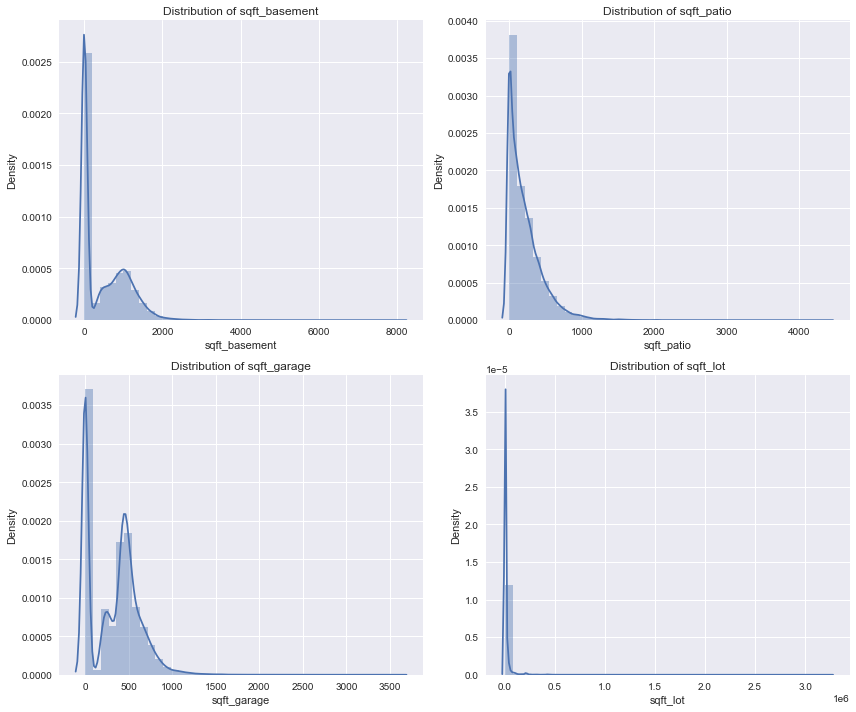

In [461]:
# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the distribution plots on subplots
sns.distplot(king['sqft_basement'], bins=40, kde=True, ax=axs[0, 0])
sns.distplot(king['sqft_patio'], bins=40, kde=True, ax=axs[0, 1])
sns.distplot(king['sqft_garage'], bins=40, kde=True, ax=axs[1, 0])
sns.distplot(king['sqft_lot'], bins=40, kde=True, ax=axs[1, 1])

# Set titles for each subplot
axs[0, 0].set_title('Distribution of sqft_basement')
axs[0, 1].set_title('Distribution of sqft_patio')
axs[1, 0].set_title('Distribution of sqft_garage')
axs[1, 1].set_title('Distribution of sqft_lot')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [462]:
# Count the number of zero values in each column
num_zeros_sqft_basement = (king['sqft_basement'] == 0).sum()
num_zeros_sqft_patio = (king['sqft_patio'] == 0).sum()
num_zeros_sqft_garage = (king['sqft_garage'] == 0).sum()
num_zeros_sqft_lot = (king['sqft_lot'] == 0).sum()

# Print the results
print("Number of zero values in sqft_basement:", num_zeros_sqft_basement)
print("Number of zero values in sqft_patio:", num_zeros_sqft_patio)
print("Number of zero values in sqft_garage:", num_zeros_sqft_garage)
print("Number of zero values in sqft_lot:", num_zeros_sqft_lot)

Number of zero values in sqft_basement: 15434
Number of zero values in sqft_patio: 6746
Number of zero values in sqft_garage: 9978
Number of zero values in sqft_lot: 0


In [463]:
# Assuming 'king' is your DataFrame containing the data

# View the value counts for each column
value_counts_sqft_basement = king['sqft_basement'].value_counts()
value_counts_sqft_patio = king['sqft_patio'].value_counts()
value_counts_sqft_garage = king['sqft_garage'].value_counts()
value_counts_sqft_lot = king['sqft_lot'].value_counts()

# Print the results
print("Value counts for sqft_basement:\n", value_counts_sqft_basement)
print("\nValue counts for sqft_patio:\n", value_counts_sqft_patio)
print("\nValue counts for sqft_garage:\n", value_counts_sqft_garage)
print("\nValue counts for sqft_lot:\n", value_counts_sqft_lot)


Value counts for sqft_basement:
 0       15434
1010      257
1100      224
1060      219
1200      192
        ...  
3350        1
1079        1
3110        1
2870        1
3590        1
Name: sqft_basement, Length: 459, dtype: int64

Value counts for sqft_patio:
 0       6746
100      906
80       886
60       858
40       839
        ... 
445        1
182        1
509        1
102        1
3550       1
Name: sqft_patio, Length: 526, dtype: int64

Value counts for sqft_garage:
 0       9978
440     1397
480     1301
400      941
420      934
        ... 
40         1
807        1
1215       1
759        1
775        1
Name: sqft_garage, Length: 411, dtype: int64

Value counts for sqft_lot:
 5000      486
6000      402
4000      374
7200      302
7500      181
         ... 
12895       1
23138       1
387684      1
617         1
4098        1
Name: sqft_lot, Length: 12223, dtype: int64


**Observations:** 
* We can see how sqft_patio, sqft_garage, and sqft_basement have missing values placed as zero. 
* We can simply drop 'view' since this columns suggests if the property was viewed which is not useful for this analysis.
* Since Basement has over half the data missing, we can instead just create a column that suggests if a home has a basement instead. 
* Garage, patio, and lot should be treatede as categories since there is not a lot of missing values. It seems that these are discrete values as not every home has a unique size.
* Treat patio
* The year renovated has a lot of zero values as well meaning not every home was renovated. Best to drop that column entirely. 

In [464]:
# Let 1 = True if it has a feature and 0 = False if it does not 
king['basement'] = king['sqft_basement'].map(lambda x: 0 if x == 0 else 1)
# Drop the original columns 
king.drop(labels=['sqft_basement', 'yr_renovated', 'view'], axis = 1, inplace = True)

# Checking for other sources of err in data (Correct datatypes, outliers) 

In [465]:
king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 21177 to 26110
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30110 non-null  object 
 1   price         30110 non-null  float64
 2   bedrooms      30110 non-null  int64  
 3   bathrooms     30110 non-null  float64
 4   sqft_living   30110 non-null  int64  
 5   sqft_lot      30110 non-null  int64  
 6   floors        30110 non-null  float64
 7   waterfront    30110 non-null  object 
 8   greenbelt     30110 non-null  object 
 9   nuisance      30110 non-null  object 
 10  condition     30110 non-null  object 
 11  grade         30110 non-null  object 
 12  heat_source   30110 non-null  object 
 13  sewer_system  30110 non-null  object 
 14  sqft_above    30110 non-null  int64  
 15  sqft_garage   30110 non-null  int64  
 16  sqft_patio    30110 non-null  int64  
 17  yr_built      30110 non-null  int64  
 18  address       30110 no

### Converting the columns date, yr_built, yr_renovated into datetime format.

In [466]:
import datetime

# Check if the columns are in datetime format
subset = ["date", "yr_built"]

for col in subset:
    x = isinstance(king[col][0], datetime.date)
    print(x)

False
False


Now that we made sure they are not in datetime format lets convert them to date format.

In [467]:
# State columns desired for datetime format
subset = ["date", "yr_built"]

for col in subset:
    king[col] = pd.to_datetime(king[col])

# Check if for loop worked correctly
for col in subset:
    x = isinstance(king[col][0], datetime.date)
    print(x)

True
True


### Convert Grade from string to usable categorical number 

In [468]:
king['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3803
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [469]:
# Define the regular expression pattern to extract the number and word separately
pattern = r'(\d+)\s(.+)'

# Use str.extract() to extract the number and word and create new columns
king[['extracted_grade_num', 'extracted_class']] = king['grade'].str.extract(pattern)

# Convert the 'extracted_number' column to integers
king['extracted_grade_num'] = king['extracted_grade_num'].astype(int)

# drop the class column
king.drop(labels=['extracted_class'], axis=1, inplace=True)

In [470]:
king.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_garage,sqft_patio,yr_built,address,lat,long,basement,extracted_grade_num
21177,2021-10-20,248448.0,3,1.5,1790,39808,1.0,NO,NO,NO,...,PUBLIC,1790,460,290,1970-01-01 00:00:00.000001958,"1526 I Street Northeast, Auburn, Washington 98...",47.32178,-122.21875,0,7
10844,2022-04-05,609000.0,4,1.5,2232,12866,1.5,NO,NO,NO,...,PUBLIC,2232,440,60,1970-01-01 00:00:00.000001934,"1412 I Street Northeast, Auburn, Washington 98...",47.32083,-122.21874,0,7
9292,2022-05-26,1020000.0,5,2.0,2760,15156,1.0,NO,NO,NO,...,PUBLIC,1380,0,0,1970-01-01 00:00:00.000001954,"1104 Southwest Shorebrook Drive, Normandy Park...",47.44375,-122.34868,1,8


### The last column that we need to change is the condition column. This column only contains the condition name but not its numeric value. We can subsitute the condition for just the number by adding a new column next to it with a for loop. 


Accodring to the website the following applies to that column:

"
Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.
"

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r 

In [471]:
# View the values in the column to make sure they line up correctly wth the website values. 
king['condition'].value_counts()

Average      18514
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [472]:
# Create a map of conditions strings to its associated values.
condition_mapping = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}

# Create a new column 'condition_num' and populate it before substitution
king['condition_num'] = 0  # Initialize the new column with 0

for index, val in king['condition'].items():
    if val in condition_mapping:
        king.loc[index, 'condition_num'] = condition_mapping[val]
    else:
        print(f"Warning: Condition '{val}' not found in the mapping.")

In [473]:
# Drop the condition column since we extracted the number
king.drop(labels='condition', axis=1, inplace=True)

### Check for outliers in the columns

We are going to need to standardize our continusos data in order to determine outliers. Any values greater than 3 satndard devaitions shoule be removed. 

In [474]:
king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 21177 to 26110
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 30110 non-null  datetime64[ns]
 1   price                30110 non-null  float64       
 2   bedrooms             30110 non-null  int64         
 3   bathrooms            30110 non-null  float64       
 4   sqft_living          30110 non-null  int64         
 5   sqft_lot             30110 non-null  int64         
 6   floors               30110 non-null  float64       
 7   waterfront           30110 non-null  object        
 8   greenbelt            30110 non-null  object        
 9   nuisance             30110 non-null  object        
 10  grade                30110 non-null  object        
 11  heat_source          30110 non-null  object        
 12  sewer_system         30110 non-null  object        
 13  sqft_above           30110 

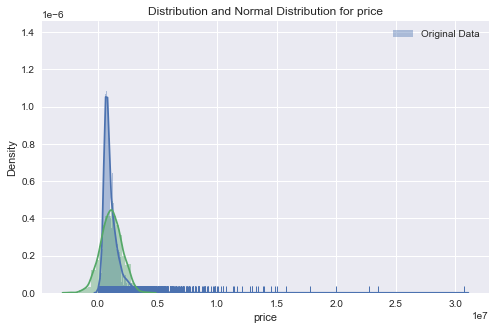

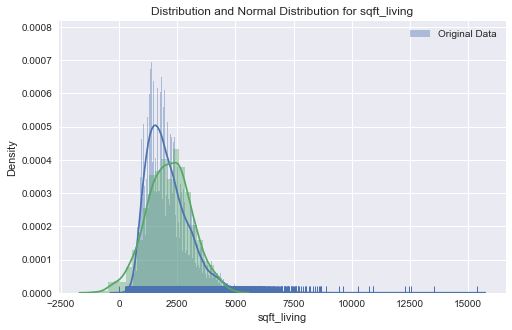

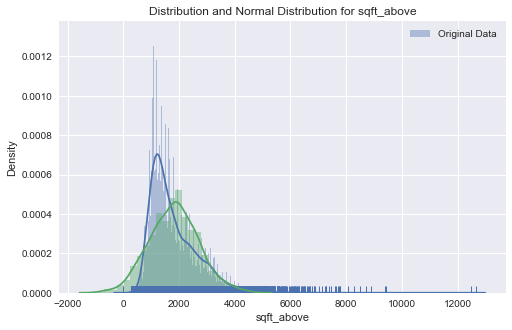

In [475]:
# Identify continuous data
continuous = ["price", "sqft_living", "sqft_above"]

# Create a new DataFrame to store the standardized data
standardized_data = king.copy()

# Standardize each feature in the 'continuous' list
for feature in standardized_data[continuous]:
    mean = king[feature].mean()
    std = king[feature].std()
    standardized_data[feature] = (king[feature] - mean) / std
    
    # Plot distribution plot
    plt.figure(figsize=(8, 5))
    sns.distplot(king[feature], bins=1000, kde=True, rug=True, label='Original Data')
    
    # Generate normal distribution data
    normal_dist = np.random.normal(mean, std, 1000)
    sns.distplot(normal_dist)
    
    plt.title(f"Distribution and Normal Distribution for {feature}")
    plt.legend()
    plt.show()


In [476]:
# Set the z-score threshold for outlier detection
z_threshold = 3

# Find outliers for each feature in 'standardized_data'
outliers = {}
for feature in standardized_data[continuous]:
    z_scores = (standardized_data[feature] - standardized_data[feature].mean()) / standardized_data[feature].std()
    outliers[feature] = standardized_data[feature][np.abs(z_scores) > z_threshold]

# Filter out the rows containing outliers from 'standardized_data'
for feature, outlier_values in outliers.items():
    standardized_data = standardized_data.loc[~standardized_data.index.isin(outlier_values.index)]

# Reset the index of 'standardized_data'
standardized_data.reset_index(drop=True, inplace=True)

# Display the 'standardized_data' DataFrame after removing outliers
standardized_data[continuous]


,price,sqft_living,sqft_above
0,-0.959825,-0.332119,-0.023201
1,-0.557643,0.121942,0.480372
2,-0.099188,0.664351,-0.490315
3,-0.556528,0.315073,-0.683996
4,-0.456136,-0.404029,-0.102952
...,...,...,...
29372,-0.662496,-0.445121,-1.059966
29373,-0.383631,-0.178026,0.147695
29374,-0.743925,-1.092312,-0.866285
29375,-0.400363,-0.794399,-0.535887


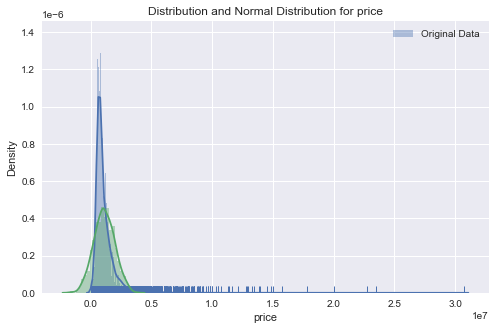

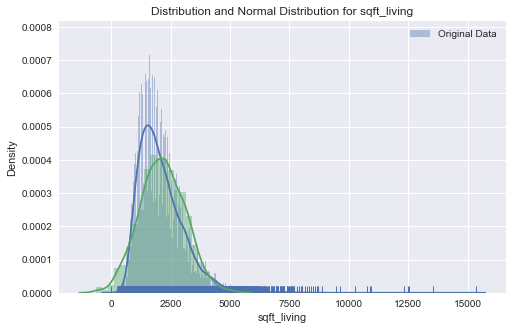

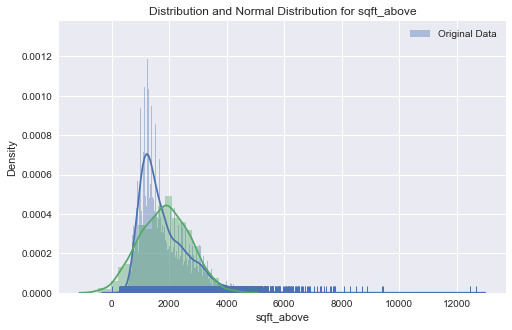

In [477]:
# Standardize each feature in the 'continuous' list
for feature in standardized_data[continuous]:
    mean = king[feature].mean()
    std = king[feature].std()
    
    # Plot distribution plot
    plt.figure(figsize=(8, 5))
    sns.distplot(king[feature], bins=1000, kde=True, rug=True, label='Original Data')
    
    # Generate normal distribution data
    normal_dist = np.random.normal(mean, std, 1000)
    sns.distplot(normal_dist)
    
    plt.title(f"Distribution and Normal Distribution for {feature}")
    plt.legend()
    plt.show()

In [478]:
# Create a new DataFrame to store the data in its original form
original_data = standardized_data.copy()

# Loop through each feature in 'continuous' list
for feature in original_data[continuous]:
    mean = king[feature].mean()
    std = king[feature].std()
    original_data[feature] = (standardized_data[feature] * std) + mean # standardized value is the z-score

# Clip the data to remove any negative values which can occur after reverting back from standardization values
num_columns = original_data.select_dtypes(include=[np.number]).columns
original_data[num_columns] = original_data[num_columns].clip(lower=0)

# Drop rows with zero values
zeros = original_data[(original_data[continuous] == 0).all(axis=1)]
original_data.drop(zeros.index, axis=0, inplace=True)

# Reset the index of 'original_data'
original_data.reset_index(drop=True, inplace=True)

# Display the 'original_data' DataFrame
original_data


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_garage,sqft_patio,yr_built,address,lat,long,basement,extracted_grade_num,condition_num
0,2021-10-20,248448.0,3,1.5,1790.0,39808,1.0,NO,NO,NO,...,1790.0,460,290,1970-01-01 00:00:00.000001958,"1526 I Street Northeast, Auburn, Washington 98...",47.321780,0.0,0,7,4
1,2022-04-05,609000.0,4,1.5,2232.0,12866,1.5,NO,NO,NO,...,2232.0,440,60,1970-01-01 00:00:00.000001934,"1412 I Street Northeast, Auburn, Washington 98...",47.320830,0.0,0,7,4
2,2022-05-26,1020000.0,5,2.0,2760.0,15156,1.0,NO,NO,NO,...,1380.0,0,0,1970-01-01 00:00:00.000001954,"1104 Southwest Shorebrook Drive, Normandy Park...",47.443750,0.0,1,8,4
3,2022-01-03,610000.0,5,2.0,2420.0,15552,1.0,NO,NO,NO,...,1210.0,0,330,1970-01-01 00:00:00.000001955,"7205 South 133rd Street, Seattle, Washington 9...",47.483870,0.0,1,7,3
4,2022-03-09,700000.0,3,2.0,1720.0,8620,1.5,NO,NO,NO,...,1720.0,0,0,1970-01-01 00:00:00.000001948,"5610 South 141st Street, Tukwila, Washington 9...",47.477070,0.0,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29372,2021-10-27,515000.0,3,1.0,1680.0,8100,1.0,NO,NO,NO,...,880.0,0,0,1970-01-01 00:00:00.000001943,"1220 Southwest 149th Street, Burien, Washingto...",47.469695,0.0,1,6,4
29373,2022-05-09,765000.0,3,2.0,1940.0,7747,1.5,NO,NO,NO,...,1940.0,430,230,1970-01-01 00:00:00.000001939,"1255 Southwest 150th Street, Burien, Washingto...",47.468255,0.0,0,7,4
29374,2022-04-07,442000.0,2,1.0,1050.0,12105,1.0,NO,NO,NO,...,1050.0,220,0,1970-01-01 00:00:00.000001939,"1249 Southwest 150th Street, Burien, Washingto...",47.468280,0.0,0,6,3
29375,2021-07-09,750000.0,2,1.0,1340.0,6181,1.5,NO,NO,YES,...,1340.0,0,540,1970-01-01 00:00:00.000001920,"1412 Southwest 152nd Street, Burien, Washingto...",47.466975,0.0,1,7,4


# Exploratory Data Analysis

Lets explore what can be continuos that in reality is categorical and vice versa. 

### Determine Linearity between variables

Determine Linearity Visually first between variables

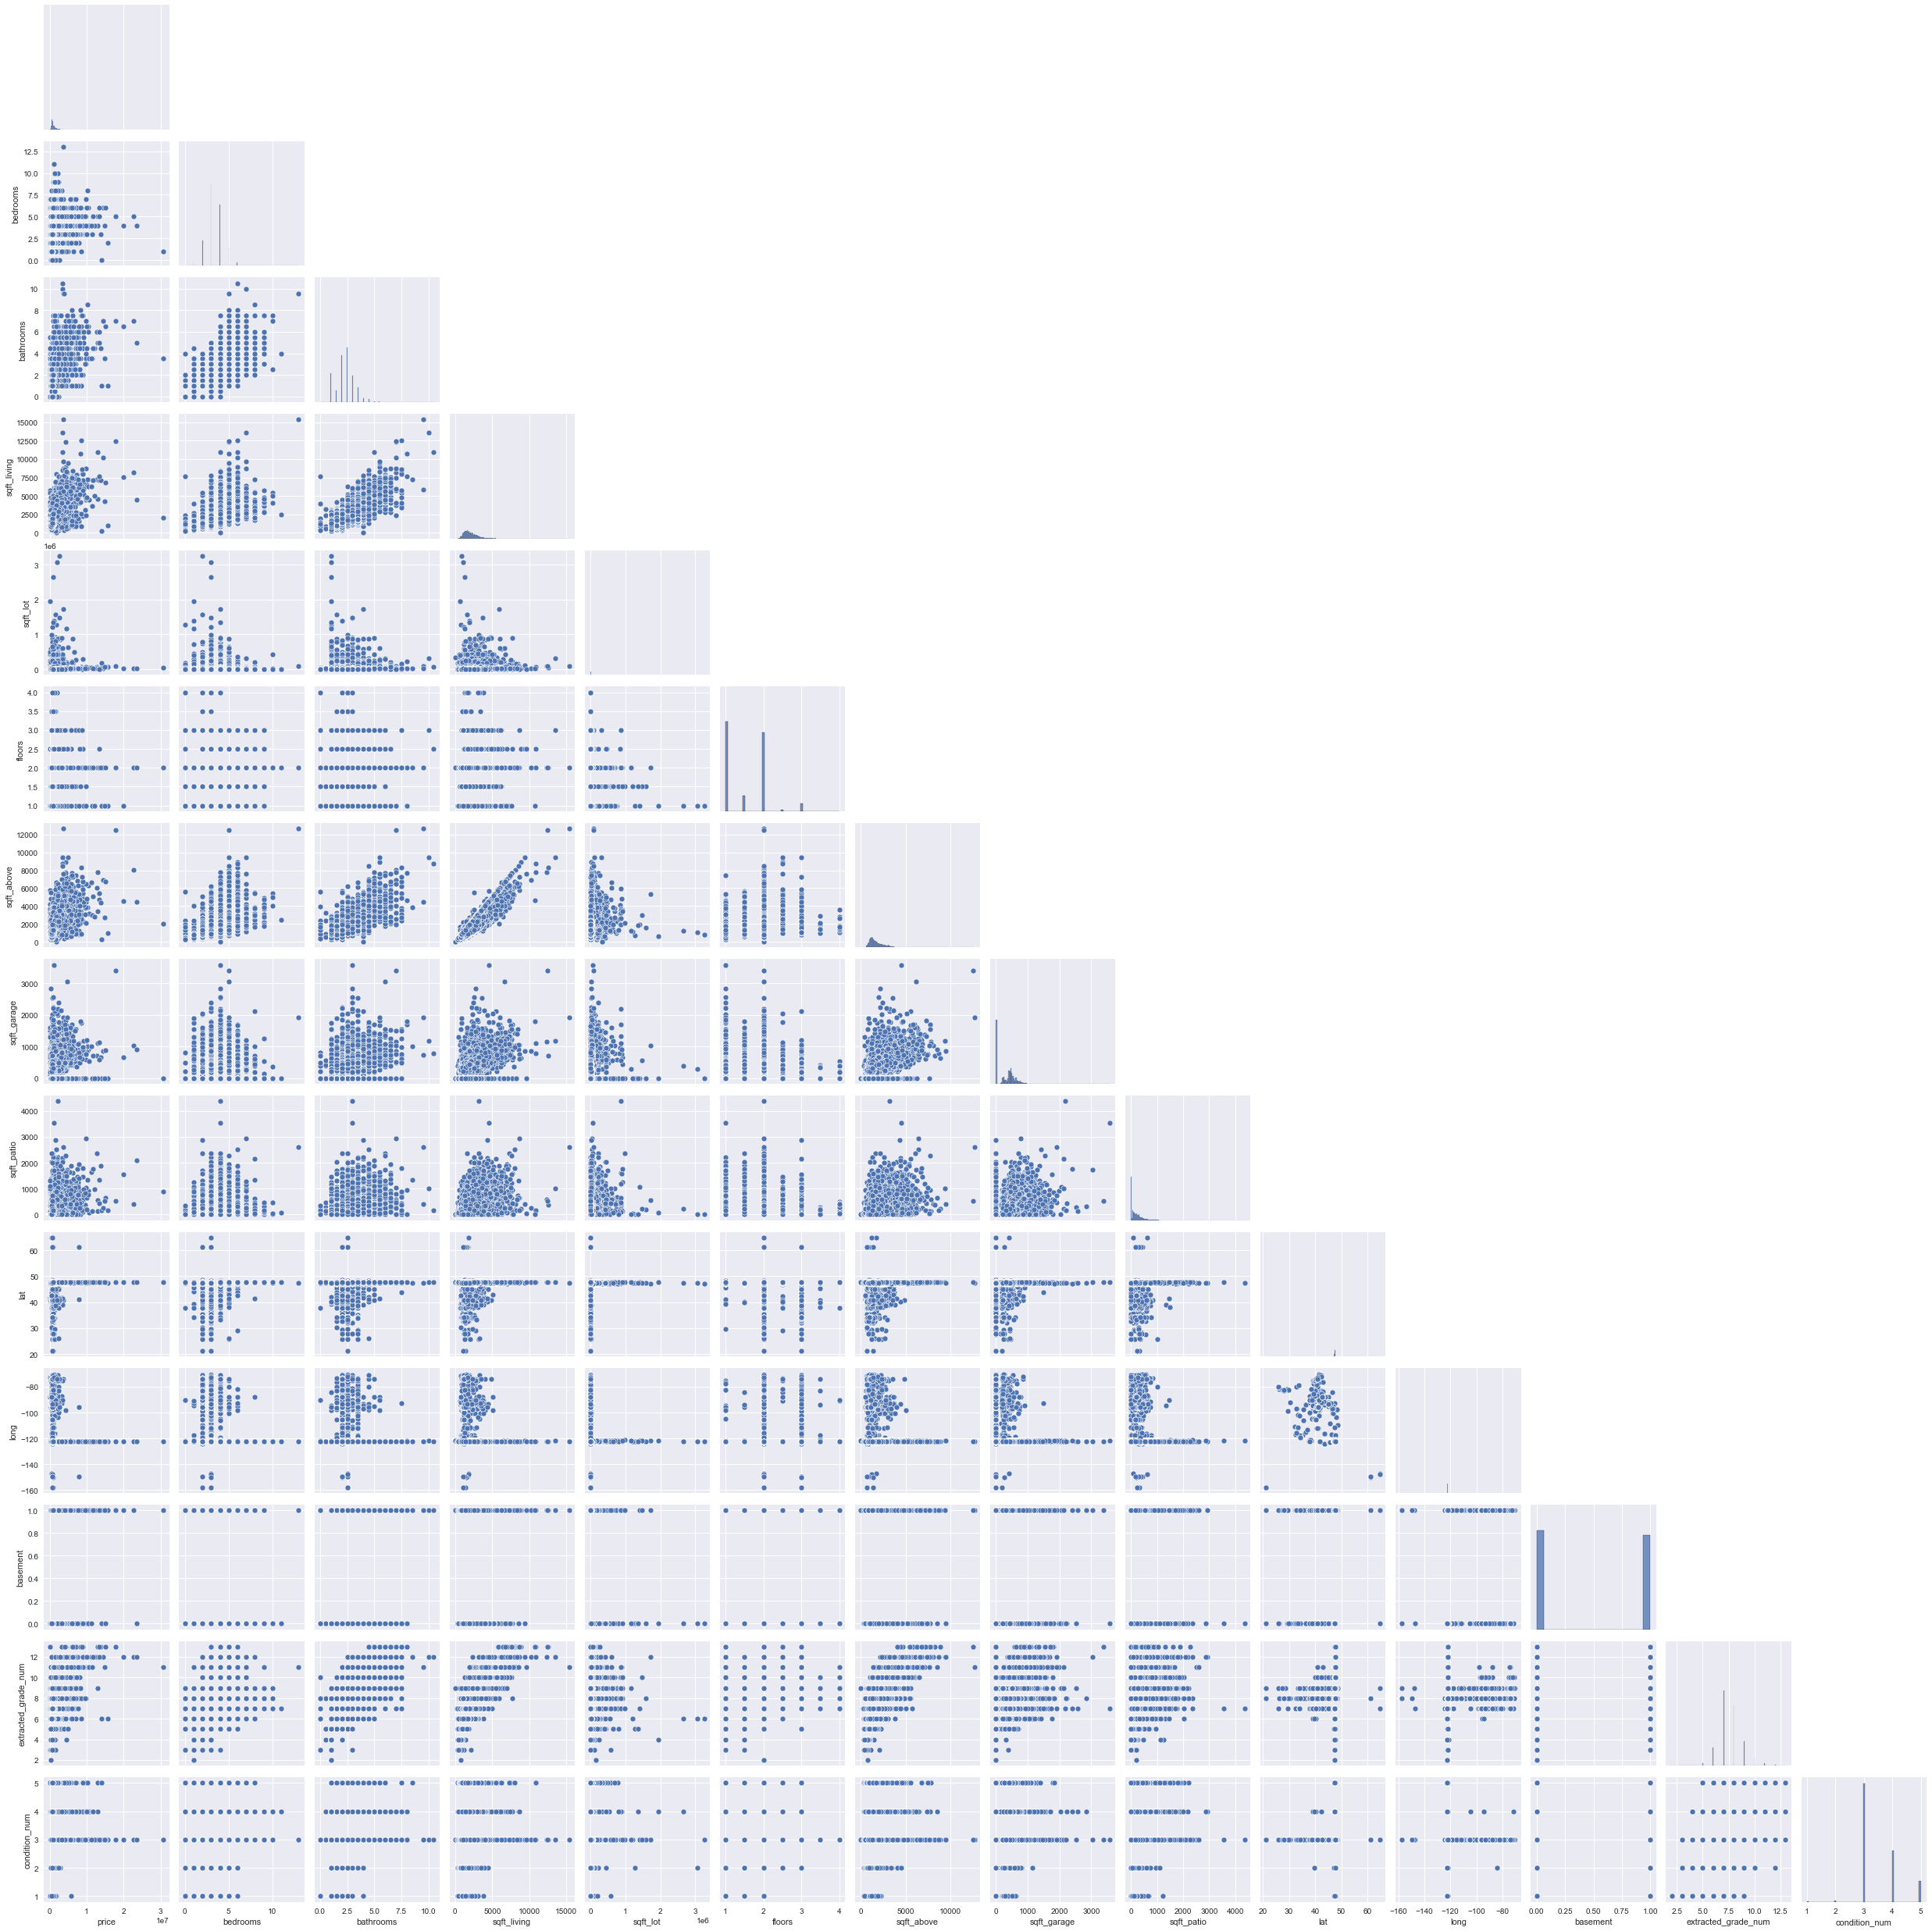

In [479]:
# Create a scatter plot matrix using seaborn
sns.pairplot(king, diag_kind='hist', corner=True)

**Observations:**
There is some degree of linearity for the following pairs that I think contribute most to a homes value:
* 'price vs sqft_above', 'price vs sqft_living', 
There seems to be a trend of increasing price for the following pairs:
* 'price vs bathrooms', 'price vs bedrooms', 'price vs extracted_grade_num', 'price vs garage', 'price vs patio', 'price vs basement'

We have two types of data in this dataset. There are categorical variables and continuous variables. Based off the descriptions and viewing the descriptions the following conclusion can be made:
1. continuous variables = price, sqft_living, sqft_above
2. categorical variables = bedrooms, bathrooms, floors, waterfront, condition, grade, sqft_lot, sqft_garage, sqft_patio

That being said lets split our data to view how they behave in respect to price which is our target variable. 

In [480]:
# split data into 2 groups of type continous and type categoricals.
# Add price to both groups to view correlations in respect to price.
continuous = ['price', 'sqft_living', 'sqft_above', 'sqft_patio', 'sqft_lot']
categoricals = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'extracted_grade_num', 'condition_num']

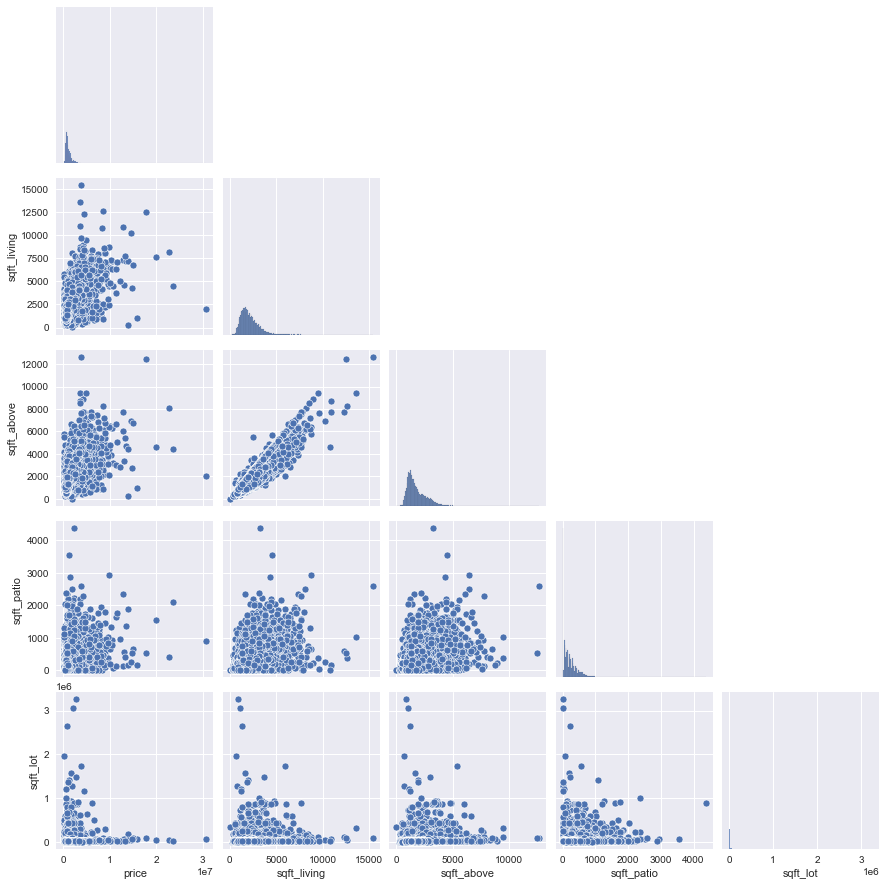

In [481]:
# Create a scatter plot matrix for continuous values using seaborn
sns.pairplot(king[continuous], diag_kind='hist', corner=True)

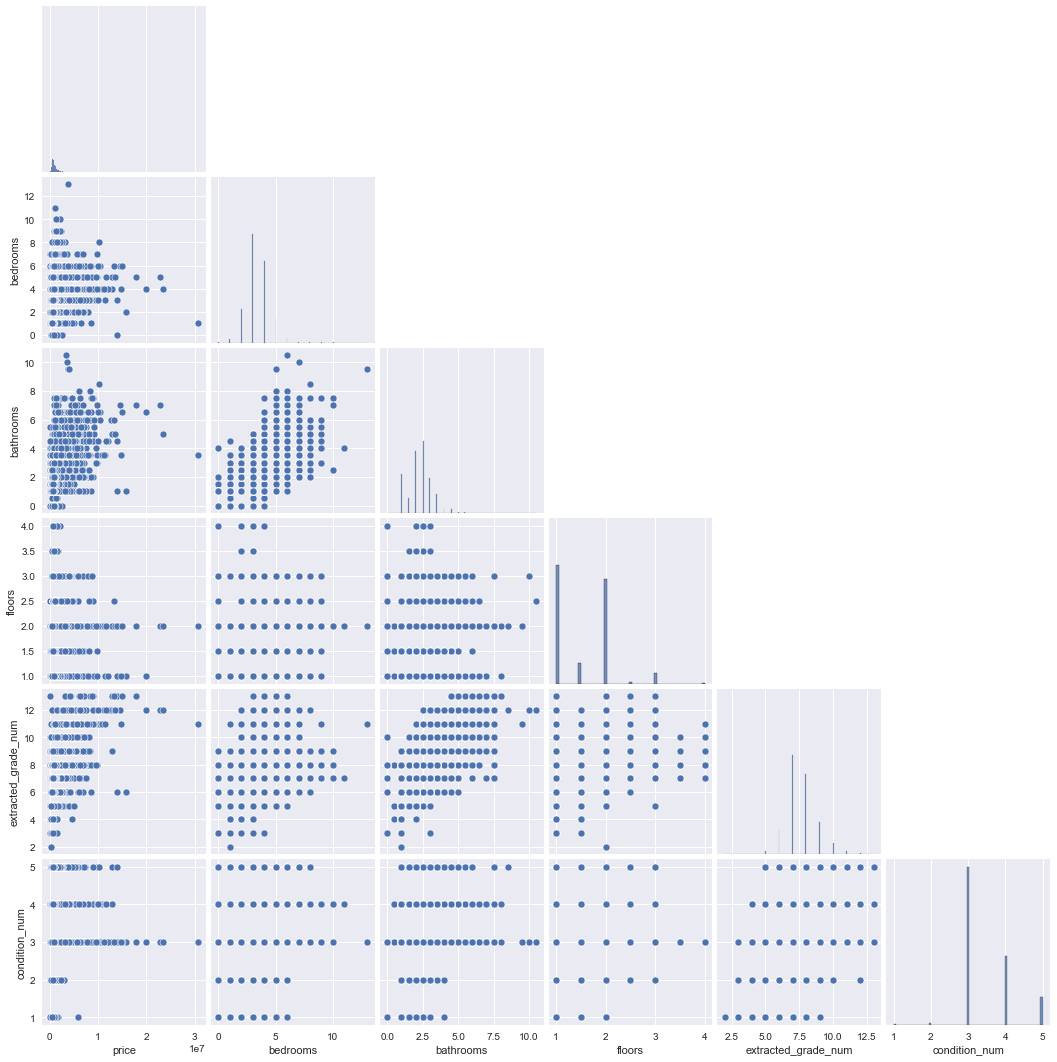

In [482]:
# Create a scatter plot matrix for categorical values using seaborn
sns.pairplot(king[categoricals], diag_kind = 'hist', corner = True)


View correlations matrix with respect to price

In [483]:
king.corr()['price']

price                  1.000000
bedrooms               0.288992
bathrooms              0.480284
sqft_living            0.608586
sqft_lot               0.086562
floors                 0.180555
sqft_above             0.538614
sqft_garage            0.263655
sqft_patio             0.313787
lat                    0.063419
long                  -0.022271
basement               0.103207
extracted_grade_num    0.566508
condition_num         -0.009563
Name: price, dtype: float64

# Factors to consider for each feature of a Home
We are looking at linearity of a feature with respect to 'price'. We should consider the following factors:

### **Skweness**
Skewness is the degree of distortion or deviation from the symmetrical normal distribution. Skewness can be seen as a measure to calculate the lack of symmetry in the data distribution. Skewness helps you identify extreme values in one of the tails. Symmetrical distributions have a skewness of 0.
* A distribution is positively skewed when the tail on the right side of the distribution is longer (also often called "fatter"). When there is positive skewness, the mean and median are bigger than the mode.
* Distributions are negatively skewed when the tail on the left side of the distribution is longer or fatter than the tail on the right side. When there is negative skewness, the mean and median are smaller than the mode.
* Skewness talks about extreme values in one tail 
* The "normality assumption" does not hold when data is skewed. When data is skewed, it must be transformed first in order to interpret that data.
#### When data is skewed use the following rules:
The rule of thumb seems to be:
* A skewness between -0.5 and 0.5 means that the data are pretty symmetrical
* A skewness between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed) means that the data are moderately skewed.
* A skewness smaller than -1 (negatively skewed) or bigger than 1 (positively skewed) means that the data are highly skewed.

![Skewness distributions](../images/Skewness_Image.png)

### **Kurtosis**
Kurtosis deals with the lengths of tails in the distribution. kurtosis aims at identifying extreme values in both tails at the same time. Kurtosis can be viewed as a measure of outliers present in the distribution.
#### Mesokurtic (kurtosis = 3) 
* Kurtosis statistics that lie close to the ones of a normal distribution. 
* Mesokurtic distributions have a kurtosis of around 3. According to this definition, the standard normal distribution has a kurtosis of 3.
#### Platykurtic (kurtosis < 3)
* The distribution is shorter and tails are thinner than the normal distribution. 
* The peak is lower and broader than Mesokurtic, which means that the tails are light and that there are fewer outliers than in a normal distribution.
#### Leptokurtic (kurtosis > 3)
* A distribution with longer and fatter tails. 
* The peak is higher and sharper than the peak of a normal distribution, which means that data have heavy tails and that there are more outliers.
* Outliers stretch your horizontal axis of the distribution, which means that the majority of the data appear in a narrower vertical range. That is why the leptokurtic distribution looks "skinny".

![Kurtosis distributions](../images/Kurtosis_types.png)

### **Pearson correlation**
* A value = 0 suggets no correlation between variables.
* A value closer to 0 implies weaker correlation between variables.
* A value closer to 1 implies stronger positive correlation between variables.
* A value closer to -1 implies stronger negative correlation between variables.

# What features in this dataset can be good predictors for the price of a home?
### Target Variable : Price

In [484]:
"""
Lets begin by observing basic statistics about the price itself. 
Observe if the price is skewed as well as its kurtosis. 
Viewing both can give us direction to determine how to deal with the price data. 
1. View skewness and Kurtosis values.
2. View a basic scatter plot of price and the number of prices/counts of each price.
3. Generate Q-Q plot to view normality of data. 
"""

'\nLets begin by observing basic statistics about the price itself. \nObserve if the price is skewed as well as its kurtosis. \nViewing both can give us direction to determine how to deal with the price data. \n1. View skewness and Kurtosis values.\n2. View a basic scatter plot of price and the number of prices/counts of each price.\n3. Generate Q-Q plot to view normality of data. \n'

In [485]:
# Generate summary statistics
king['price'].describe()

count    3.011000e+04
mean     1.108921e+06
std      8.964895e+05
min      2.736000e+04
25%      6.491180e+05
50%      8.600000e+05
75%      1.300000e+06
max      3.075000e+07
Name: price, dtype: float64

In [486]:
# Obtain skewness value
skewness = king['price'].skew()
print('Skewness_value: ', skewness)
# Obtain Kurtosis value
kurtosis = king['price'].kurtosis()
print('kurtosis_value: ', kurtosis)

Skewness_value:  6.608504428167346
kurtosis_value:  106.26296241029947


1. Overall the price data is very positively skewed and favors is skewed towards values in price closer to zero dollars. 
2. The kurtosis value suggests that the data in price is leptokurtic. This suggests that there is a large tail due to large outliers. This most likely indicates that there are homes that sold for millions of dollars more in higher class areas in this datasey which might be rare to sell. 

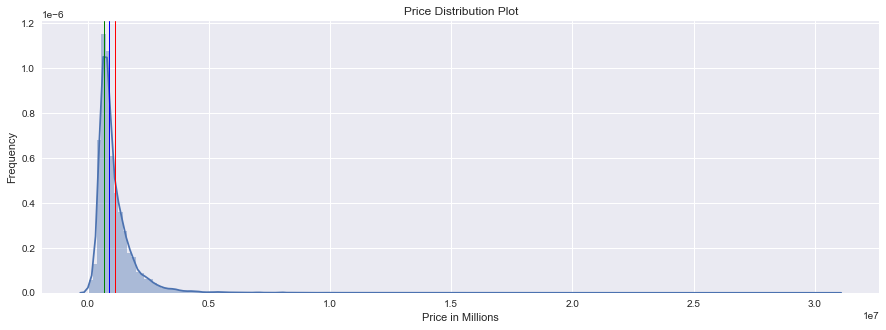

Text(0.5, 1.0, 'Price Qunatile-Quantile Plot')

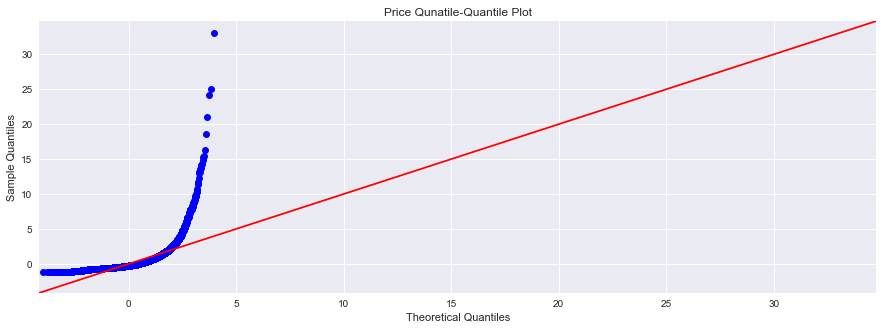

In [487]:
# Generate a distribution plot to view the price data. 
plt.figure(figsize=(15, 5))
sns.distplot(king['price'], bins=int(round(len(king['price'])**0.5)), kde=True)
plt.xlabel("Price in Millions")
plt.ylabel("Frequency")
plt.title("Price Distribution Plot")
plt.axvline(x=king['price'].mean(), linestyle="-", linewidth=1, color="r")
plt.axvline(x=king['price'].median(), linestyle="-", linewidth=1, color="b")
plt.axvline(x=king['price'].mode().iloc[0], linestyle="-", linewidth=1, color="g")
plt.xticks(fontsize = 10)
plt.show()

#check for normality
fig = sm.graphics.qqplot(king['price'], dist = stats.norm, line = '45', fit = True)
fig.set_size_inches(15, 5)
plt.title('Price Qunatile-Quantile Plot')

Clearly the price distribution does not follow a normal distribution and would require a transformation. Lets transform the price data by using log transformation to help with this. 

#### Observe and check for linearity with target variable of interest price_log with other features of a house.

The continuos variables in this dataset are: 
* sqft_living
* sqft_above
* sqft_lot
* sqft_garage
* sqft_patio
* price
* lat
* long

The categoraical variables in this dataset are: 
* bedrooms
* bathrooms
* floors
* waterfront
* greenbelt
* nuisance
* view
* condition
* grade
* heat_source
* sewer_system
* yr_built
* yr_renovated
* garage

## Continuos Variables

#### Linearity check of Continuos variables

In [488]:
# View columns in dataset.
for col in king.columns:
    print(col)

date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
greenbelt
nuisance
grade
heat_source
sewer_system
sqft_above
sqft_garage
sqft_patio
yr_built
address
lat
long
basement
extracted_grade_num
condition_num


In [489]:
# define subset of continuous variables 
# As mentioned before continuos = ["sqft_living", "sqft_above", "sqft_lot", "sqft_garage", "sqft_patio"]

In [490]:
# Create a function that can return linearity information and geenrate disttribution plots and q-q plots
def linearity_check(data, list):
    """
    Function arguments are data=dataframe, target=target_variable to check target variable for linearity check. 
    Generates Q-Q plots and distribution plots as well an organized dataframe containing the skewness and kurtosis values of the variables in list.
    """
    result_df = pd.DataFrame(columns=['Variable', 'Skewness', 'Kurtosis'])
    
    for target in list:
    # Extracting the mean, median
        mean_value = data[target].mean()
        median_value = data[target].median()
        
        # Generate distribution plot with target variable
        plt.figure(figsize=(15, 5))
        sns.distplot(data[target], bins=int(round(len(data[target])**0.5)), kde=True)
        plt.xlabel(f"{target}")
        plt.ylabel("Frequency")
        plt.title(f"{target} Distribution Plot")
        plt.axvline(x=mean_value, linestyle="-", linewidth=1, color="r")
        plt.axvline(x=median_value, linestyle="-", linewidth=1, color="b")
        plt.xticks(fontsize = 10)
        plt.show()
        
        #check for normality in price_log
        fig = sm.graphics.qqplot(data[target], dist = stats.norm, line = '45', fit = True)
        fig.set_size_inches(15, 5)
        plt.title(f'{target} Quantile-Quantile Plot')
        
        # Generates skewness value
        skewness_value = data[target].skew()
        # Generates kurtosis value
        kurtosis_value = data[target].kurtosis()
        
        # Append to the result dataframe
        result_df = result_df.append({'Variable': target, 'Skewness': skewness_value, 'Kurtosis': kurtosis_value}, ignore_index=True)
    return result_df

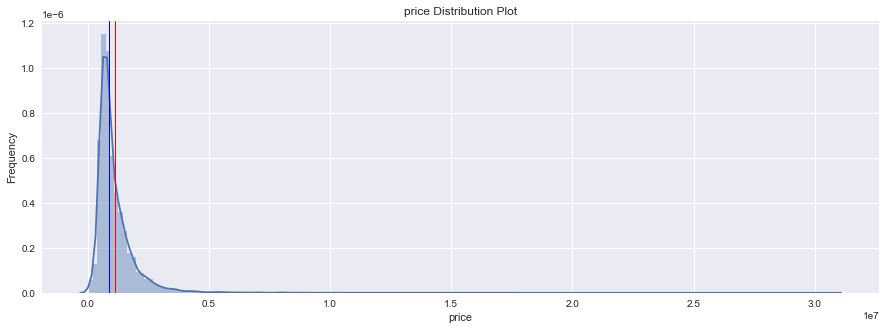

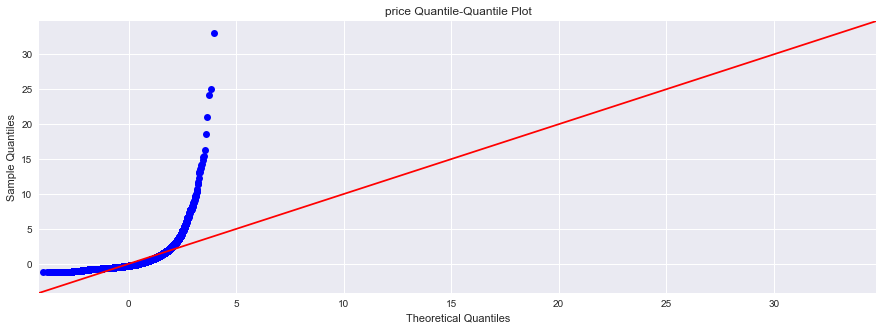

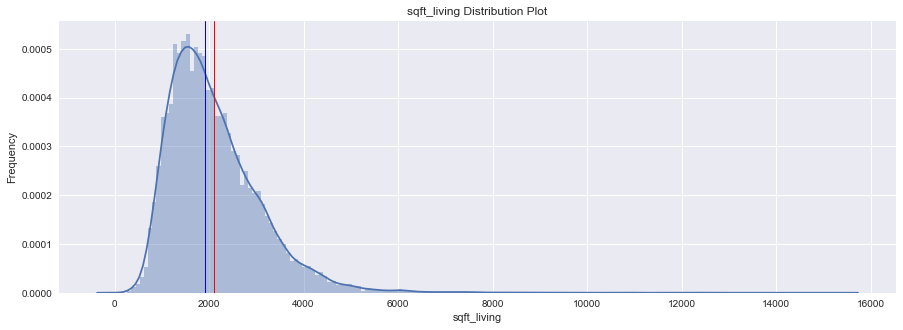

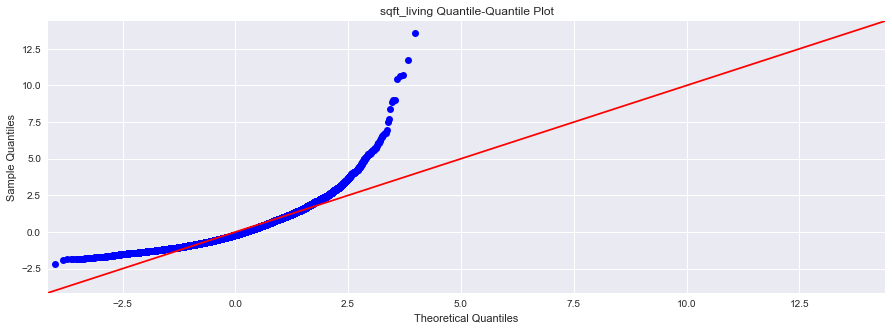

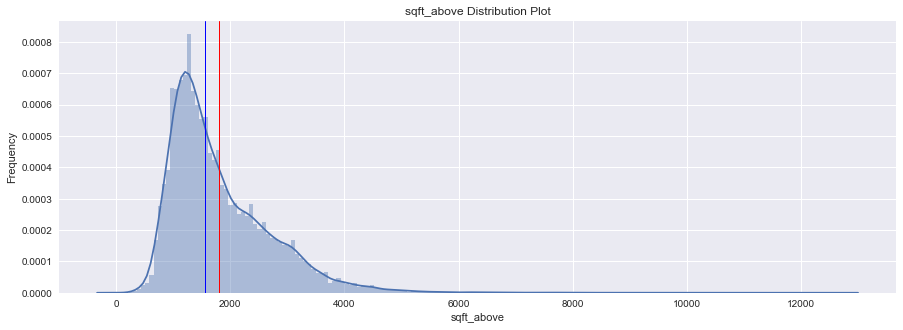

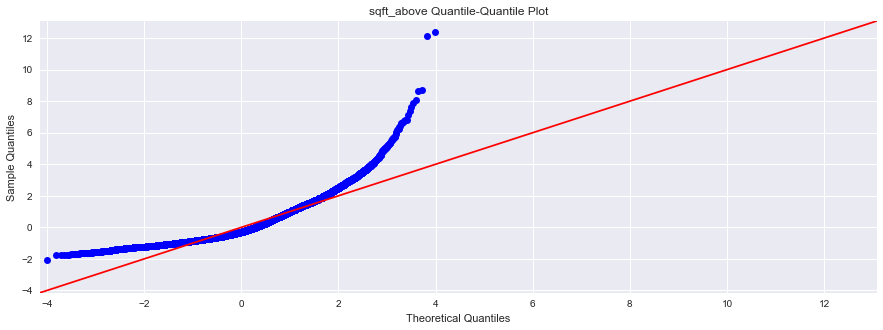

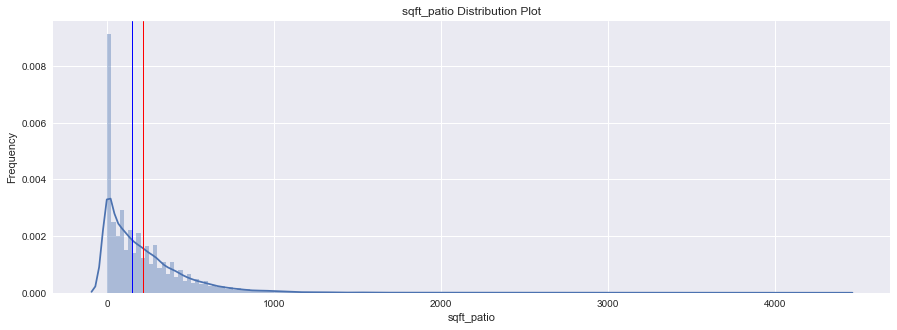

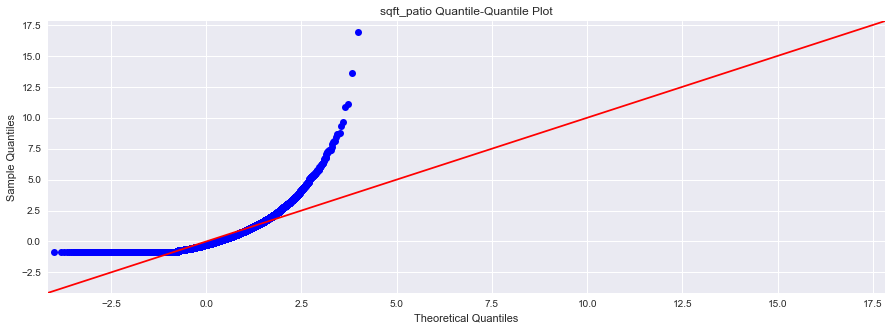

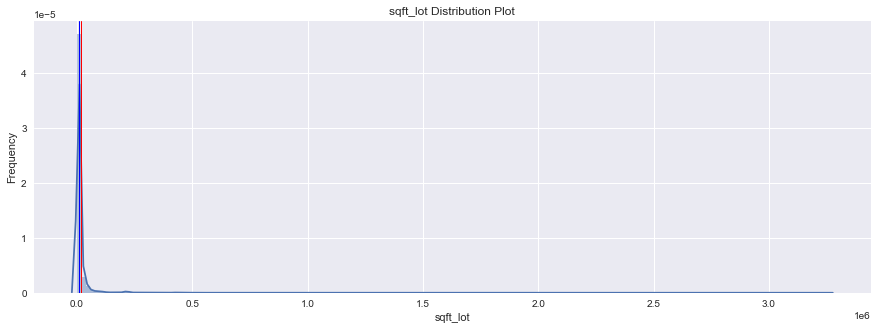

,Variable,Skewness,Kurtosis
0,price,6.608504,106.262962
1,sqft_living,1.611730,6.720625
2,sqft_above,1.556087,4.811108
3,sqft_patio,2.346323,11.684839
4,sqft_lot,21.277548,791.674133


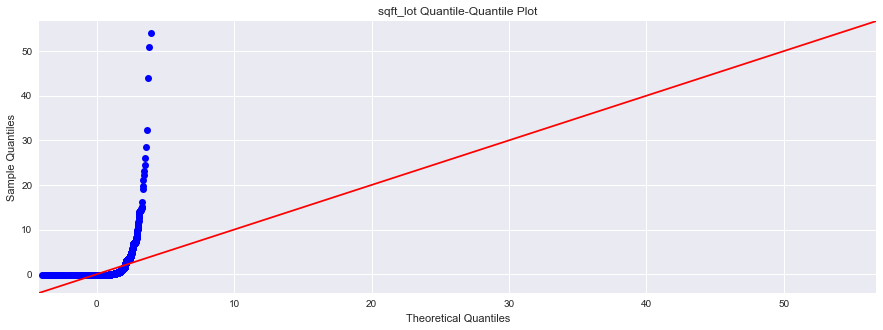

In [491]:
linearity_check(king, continuous)

**Observations**: 

Sqft_living:

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality.

sqft_above: 

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality.

sqft_lot: 

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality. It also seems that it has major outliers.

sqft_garage: 

> We can see how the data is positively skewed moderately. It is also Platykurtic. We can attempt a log transformation to bring the data closer norm. It also seems that not every home has a garage. Maybe it would be better to use this as an interaction term.

sqft_patio: 

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality. It also seems that not every home has a patio. Maybe it would be better to use this as an interaction term.

#### Log Transformation for continuous variables. 

Before I convert all variables lets create a copy of the dataframe so we have a dataframe with only the continous variables transformed and the king df with price transformed only.

In [492]:
transformed_king = king.copy()

In [493]:
# Create a function that can transform the features into log[feature]. 
def transform(data, feature):
    """
    Takes in a dataset=data and a subset of columns=feature. 
    Function then transforms the features into log[feature] and appends a new column in the original dataframe. 
    """
    # import required libraries.
    import numpy as np
    # for loop iterating through columns in subset.
    for col in feature:
        data[f"{col}_log"] = np.log(data[col])

Transform only price

In [494]:
# Create a new subset because we don't want to transform the coordinates of the homes long and latitude 
# as well as the basement since we will be using it instead as a categorical variable.
subset = ["price", "sqft_living", "sqft_above", "sqft_lot", "sqft_garage", "sqft_patio"]

# Use log transformation function
transform(transformed_king, subset)

transformed_king.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,long,basement,extracted_grade_num,condition_num,price_log,sqft_living_log,sqft_above_log,sqft_lot_log,sqft_garage_log,sqft_patio_log
21177,2021-10-20,248448.0,3,1.5,1790,39808,1.0,NO,NO,NO,...,-122.21875,0,7,4,12.422989,7.489971,7.489971,10.591823,6.131226,5.669881
10844,2022-04-05,609000.0,4,1.5,2232,12866,1.5,NO,NO,NO,...,-122.21874,0,7,4,13.319574,7.710653,7.710653,9.462343,6.086775,4.094345
9292,2022-05-26,1020000.0,5,2.0,2760,15156,1.0,NO,NO,NO,...,-122.34868,1,8,4,13.835313,7.922986,7.229839,9.626152,-inf,-inf
17878,2022-01-03,610000.0,5,2.0,2420,15552,1.0,NO,NO,NO,...,-122.24393,1,7,3,13.321214,7.791523,7.098376,9.651945,-inf,5.799093
14450,2022-03-09,700000.0,3,2.0,1720,8620,1.5,NO,NO,NO,...,-122.26385,0,7,5,13.458836,7.450080,7.450080,9.061840,-inf,-inf


In [495]:
subset = ["price"]

# Use log transformation function
transform(king, subset)

king.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,address,lat,long,basement,extracted_grade_num,condition_num,price_log
21177,2021-10-20,248448.0,3,1.5,1790,39808,1.0,NO,NO,NO,...,460,290,1970-01-01 00:00:00.000001958,"1526 I Street Northeast, Auburn, Washington 98...",47.32178,-122.21875,0,7,4,12.422989
10844,2022-04-05,609000.0,4,1.5,2232,12866,1.5,NO,NO,NO,...,440,60,1970-01-01 00:00:00.000001934,"1412 I Street Northeast, Auburn, Washington 98...",47.32083,-122.21874,0,7,4,13.319574
9292,2022-05-26,1020000.0,5,2.0,2760,15156,1.0,NO,NO,NO,...,0,0,1970-01-01 00:00:00.000001954,"1104 Southwest Shorebrook Drive, Normandy Park...",47.44375,-122.34868,1,8,4,13.835313
17878,2022-01-03,610000.0,5,2.0,2420,15552,1.0,NO,NO,NO,...,0,330,1970-01-01 00:00:00.000001955,"7205 South 133rd Street, Seattle, Washington 9...",47.48387,-122.24393,1,7,3,13.321214
14450,2022-03-09,700000.0,3,2.0,1720,8620,1.5,NO,NO,NO,...,0,0,1970-01-01 00:00:00.000001948,"5610 South 141st Street, Tukwila, Washington 9...",47.47707,-122.26385,0,7,5,13.458836


In [496]:
# Check for infinite values in the 'sqft_lot' column
lot_infinite = np.isinf(transformed_king['sqft_lot_log']).any()
garage_infinite = np.isinf(transformed_king['sqft_garage_log']).any()
patio_infinite = np.isinf(transformed_king['sqft_patio_log']).any()

print(f'It is {lot_infinite} that sqft_lot_log has infinite values')
print(f'It is {garage_infinite} that sqft_garage_log has infinite values')
print(f'It is {patio_infinite} that sqft_patio_log has infinite values')


It is False that sqft_lot_log has infinite values
It is True that sqft_garage_log has infinite values
It is True that sqft_patio_log has infinite values


In [497]:
print(king['sqft_garage'].value_counts())
print("")
print(king['sqft_garage'].value_counts())

0       9978
440     1397
480     1301
400      941
420      934
        ... 
40         1
807        1
1215       1
759        1
775        1
Name: sqft_garage, Length: 411, dtype: int64

0       9978
440     1397
480     1301
400      941
420      934
        ... 
40         1
807        1
1215       1
759        1
775        1
Name: sqft_garage, Length: 411, dtype: int64


Having infinite values can suggest that the feature we thought was continuos is actually an ordinal categorical feature. After viewing its values we can see how it actually has discrete values. There also seems to be homes without such features. Lets treat this feature as if a home has the feature just like basement. we can keep it discrete and account for it as a whole. When it comes to modeling we will see how it affects the model. 

In [498]:
king.drop(labels='price', axis=1, inplace=True)
transformed_king.drop(labels = ['price', 'sqft_living', 'sqft_above', 'sqft_garage_log', 'sqft_lot', 'sqft_patio_log'], axis=1, inplace=True)


In [499]:
king.head(3)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,grade,...,sqft_garage,sqft_patio,yr_built,address,lat,long,basement,extracted_grade_num,condition_num,price_log
21177,2021-10-20,3,1.5,1790,39808,1.0,NO,NO,NO,7 Average,...,460,290,1970-01-01 00:00:00.000001958,"1526 I Street Northeast, Auburn, Washington 98...",47.32178,-122.21875,0,7,4,12.422989
10844,2022-04-05,4,1.5,2232,12866,1.5,NO,NO,NO,7 Average,...,440,60,1970-01-01 00:00:00.000001934,"1412 I Street Northeast, Auburn, Washington 98...",47.32083,-122.21874,0,7,4,13.319574
9292,2022-05-26,5,2.0,2760,15156,1.0,NO,NO,NO,8 Good,...,0,0,1970-01-01 00:00:00.000001954,"1104 Southwest Shorebrook Drive, Normandy Park...",47.44375,-122.34868,1,8,4,13.835313


In [500]:
transformed_king.head(3)

,date,bedrooms,bathrooms,floors,waterfront,greenbelt,nuisance,grade,heat_source,sewer_system,...,address,lat,long,basement,extracted_grade_num,condition_num,price_log,sqft_living_log,sqft_above_log,sqft_lot_log
21177,2021-10-20,3,1.5,1.0,NO,NO,NO,7 Average,Oil,PUBLIC,...,"1526 I Street Northeast, Auburn, Washington 98...",47.32178,-122.21875,0,7,4,12.422989,7.489971,7.489971,10.591823
10844,2022-04-05,4,1.5,1.5,NO,NO,NO,7 Average,Gas,PUBLIC,...,"1412 I Street Northeast, Auburn, Washington 98...",47.32083,-122.21874,0,7,4,13.319574,7.710653,7.710653,9.462343
9292,2022-05-26,5,2.0,1.0,NO,NO,NO,8 Good,Oil,PUBLIC,...,"1104 Southwest Shorebrook Drive, Normandy Park...",47.44375,-122.34868,1,8,4,13.835313,7.922986,7.229839,9.626152


Now that we have everything normalized lets check the corelations between variables and price using a matrix. 

In [501]:
def view_correlation(data, subset):
    # Add 'price' and 'price_log' to the subset list
    for col in subset:
        #plot 'price_log' vs. sqft_subset_log'
        plt.figure(figsize = (15, 5))
        sns.regplot(
            x = data[col],
            y = data['price_log'],
            data = data,
            scatter=True,
            fit_reg=True,
            color='red'
        )
        plt.title(f'{col} of The Home vs. Log Price')
        plt.xlabel(f'{col}')
        plt.ylabel('Log Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
        
    corr_df = data[subset].corr()
    return corr_df

In [502]:
cont_subset = ["sqft_living_log", "sqft_above_log", "sqft_lot_log", "price_log"]
view_correlation(transformed_king, subset)

KeyError: 'price'

<Figure size 1080x360 with 0 Axes>

**Observations:**
1. sqft_living_log and sqft_above_log are moderately positively correlated with price_log. 
2. sqft_lot_log has very little to none with price_log

## Exploring interactions the Continuous variables:

Now that the continuos variables are explored and interpreted lets view the interactions of basement, patio, and garage with price

Lets first convert patio and garage to binary

In [ ]:
king['garage'] = king['sqft_garage'].apply(lambda x: 1 if x > 0 else 0)
king['patio'] = king['sqft_patio'].apply(lambda x: 1 if x > 0 else 0)
transformed_king['garage'] = transformed_king['sqft_garage'].apply(lambda x: 1 if x > 0 else 0)
transformed_king['patio'] = transformed_king['sqft_patio'].apply(lambda x: 1 if x > 0 else 0)

# drop old columns
king.drop(labels=["sqft_garage", "sqft_patio"], axis=1, inplace=True)
transformed_king.drop(labels=["sqft_garage", "sqft_patio"], axis=1, inplace=True)

First investigation is Basement:

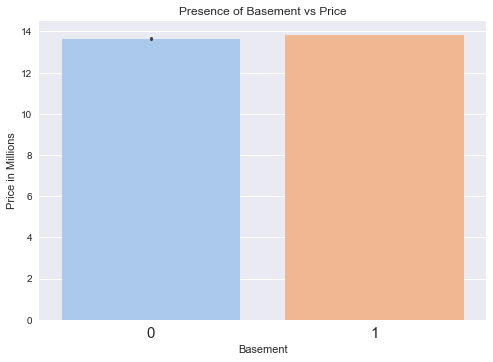

In [ ]:
# Make a barplot of basement vs price
sns.barplot(x=king['basement'], 
            y=king['price_log'],
            palette="pastel",
            )
plt.title("Presence of Basement vs Price")
plt.xlabel("Basement")
plt.ylabel("Price in Millions")
plt.xticks(fontsize = 15)
plt.show()

**Observation:**
1. It seems that having a basement does not make much of a difference in price for homes. 

In [ ]:
"""
Use Basement as an interaction term for the other continuos variables. 
"""

'\nUse Basement as an interaction term for the other continuos variables. \n'

In [ ]:
def price_interations_basement(data, subset):
    for col in subset:
        #plot 'price_log' vs. sqft_subset_log'
        plt.figure(figsize = (15, 5))
        data.plot.scatter(
            x = col,
            y = 'price_log',
            c = 'basement',
            cmap = 'plasma',
            alpha = 0.5,
        );
        plt.title(f'{col} of The Home vs. Log Price')
        plt.xlabel(f'{col}')
        plt.ylabel('Log Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
    # Compute the correlation matrix between 'basement', 'price', and 'price_log'
    corr_matrix = data[subset + ['basement']].corr()
    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
    plt.title('Correlation Matrix: Basement, Price, and Log Price')
    plt.show()

<Figure size 1080x360 with 0 Axes>

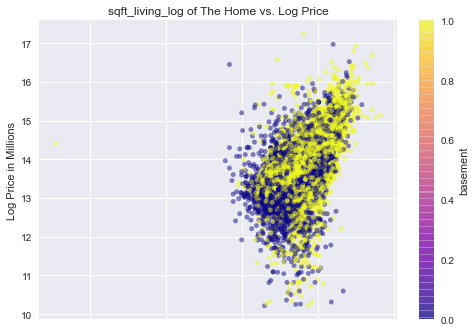

<Figure size 1080x360 with 0 Axes>

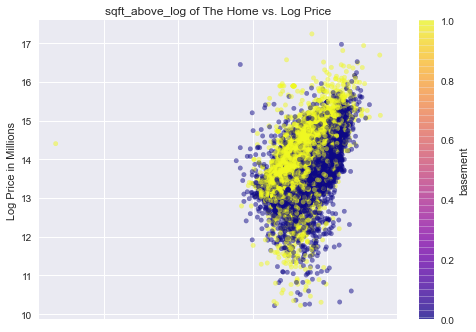

<Figure size 1080x360 with 0 Axes>

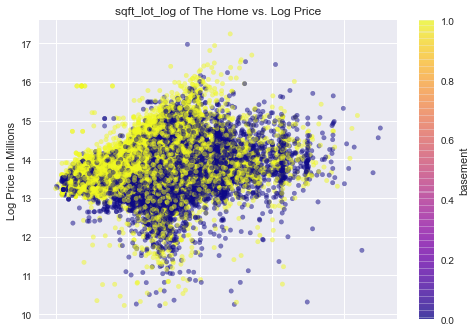

<Figure size 1080x360 with 0 Axes>

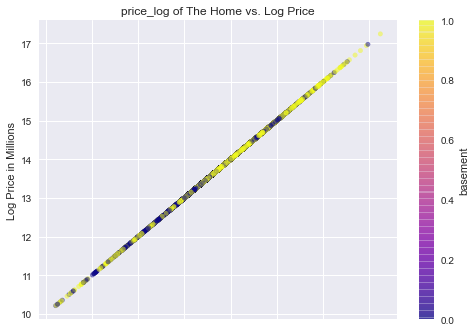

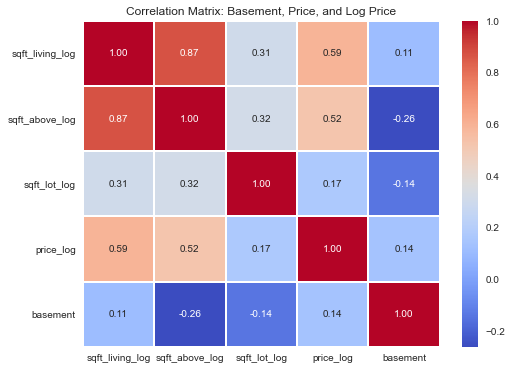

In [ ]:
subset = ["sqft_living_log", "sqft_above_log", "sqft_lot_log", "price_log"]
price_interations_basement(transformed_king, subset)

**Observations:**
1. Overall there seems to be more houses with basements.
2. According to the interaction scatter plots the presence of a basement can increase a home value however it is not a consistent indicator that it would outcompete a home with no basement. This can be seen with the correlations of basement with price, price_log. This suggests there there is some influence that is not being accounted for in a price for a home in King County. 

Second investigation is Garage

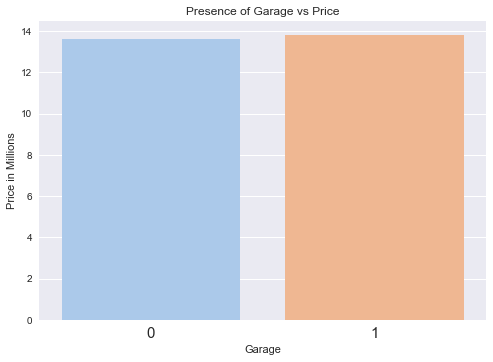

In [ ]:
# Make a barplot of basement vs price
sns.barplot(x=king['garage'], 
            y=king['price_log'],
            palette="pastel",
            )
plt.title("Presence of Garage vs Price")
plt.xlabel("Garage")
plt.ylabel("Price in Millions")
plt.xticks(fontsize = 15)
plt.show()

In [ ]:
def price_interations_garage(data, subset):
    """
    Takes arguments data=dataframe and subset=list of columns to be analyzed in dataframe. 
    The interaction variable is garage.
    """    
    for col in subset:
        #plot 'price_log' vs. sqft_subset_log'
        plt.figure(figsize = (15, 5))
        data.plot.scatter(
            x = col,
            y = 'price_log',
            c = 'garage',
            cmap = 'plasma',
            alpha = 0.5,
        );
        plt.title(f'{col} of The Home vs. Log Price')
        plt.ylabel('Log Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
    # Compute the correlation matrix between 'basement', 'price', and 'price_log'
    corr_matrix = data[subset + ['garage']].corr()
    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
    plt.title('Correlation Matrix: Basement, Price, and Log Price')
    plt.show()

<Figure size 1080x360 with 0 Axes>

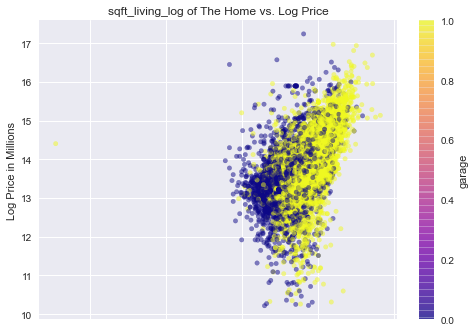

<Figure size 1080x360 with 0 Axes>

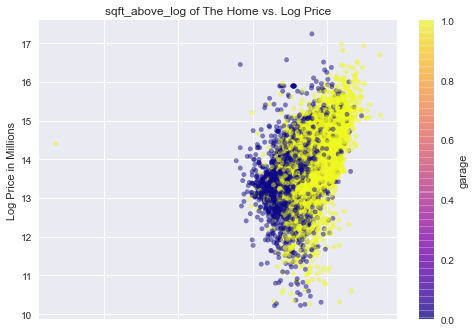

<Figure size 1080x360 with 0 Axes>

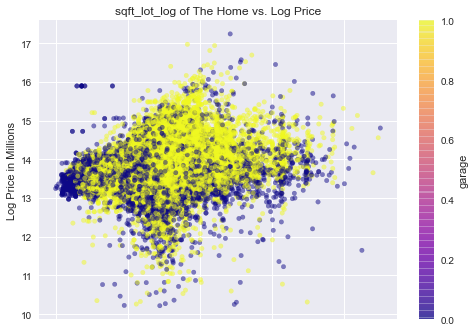

<Figure size 1080x360 with 0 Axes>

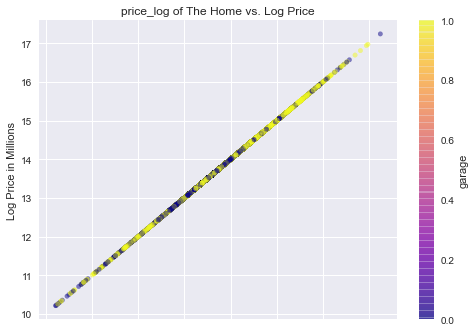

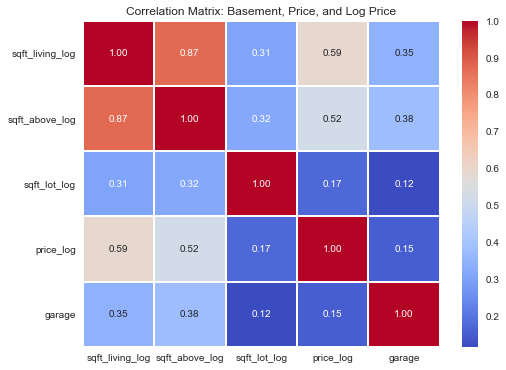

In [ ]:
subset = ["sqft_living_log", "sqft_above_log", "sqft_lot_log", "price_log"]
price_interations_garage(transformed_king, subset)

**Observations:**
1. Overall there seems to be more houses with a garage.
2. According to the interaction scatter plots the presence of a garage can increase a home value however it is not a consistent indicator that it would outcompete a home with no garage. This can be seen with the correlations of garage with price_log. This suggests there there is some influence that is not being accounted for in a price for a home in King County. 
3. garage does not appear to be highly correlated with price_log. 

## Categorical variables

In [ ]:
king.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,grade,...,yr_built,address,lat,long,basement,extracted_grade_num,condition_num,price_log,garage,patio
21177,2021-10-20,3,1.5,1790,39808,1.0,NO,NO,NO,7 Average,...,1970-01-01 00:00:00.000001958,"1526 I Street Northeast, Auburn, Washington 98...",47.32178,-122.21875,0,7,4,12.422989,1,1
10844,2022-04-05,4,1.5,2232,12866,1.5,NO,NO,NO,7 Average,...,1970-01-01 00:00:00.000001934,"1412 I Street Northeast, Auburn, Washington 98...",47.32083,-122.21874,0,7,4,13.319574,1,1
9292,2022-05-26,5,2.0,2760,15156,1.0,NO,NO,NO,8 Good,...,1970-01-01 00:00:00.000001954,"1104 Southwest Shorebrook Drive, Normandy Park...",47.44375,-122.34868,1,8,4,13.835313,0,0
17878,2022-01-03,5,2.0,2420,15552,1.0,NO,NO,NO,7 Average,...,1970-01-01 00:00:00.000001955,"7205 South 133rd Street, Seattle, Washington 9...",47.48387,-122.24393,1,7,3,13.321214,0,1
14450,2022-03-09,3,2.0,1720,8620,1.5,NO,NO,NO,7 Average,...,1970-01-01 00:00:00.000001948,"5610 South 141st Street, Tukwila, Washington 9...",47.47707,-122.26385,0,7,5,13.458836,0,0


In [ ]:
"""
We need to covert our waterfront, greenbelt, nuisance to interpretable values rather than strings. Yes = 1 and No = 0. 
"""

'\nWe need to covert our waterfront, greenbelt, nuisance to interpretable values rather than strings. Yes = 1 and No = 0. \n'

In [ ]:
# Creata a subset of columns needing data replacement 
columns_to_convert = ["greenbelt", "waterfront", "nuisance"]

# Create a dictionary to map 'YES' to 1 and 'NO' to 0
mapping = {'NO': 0, 'YES': 1}

# Iterate through each column in the list and perform the substitution
for col in columns_to_convert:
    king[col] = king[col].astype(str).replace(mapping).astype(int)
    transformed_king[col] = transformed_king[col].astype(str).replace(mapping).astype(int)

In [ ]:
for col in columns_to_convert:
    print(king[col].value_counts())
    print("")
    print(transformed_king[col].value_counts())

0    29338
1      772
Name: greenbelt, dtype: int64

0    29338
1      772
Name: greenbelt, dtype: int64
0    29599
1      511
Name: waterfront, dtype: int64

0    29599
1      511
Name: waterfront, dtype: int64
0    24861
1     5249
Name: nuisance, dtype: int64

0    24861
1     5249
Name: nuisance, dtype: int64


Now that we converted our values to zeros and ones we can start viewing relationships between our categorical variables and price.

In [ ]:
for col in king.columns:
    print(col)

date
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
greenbelt
nuisance
grade
heat_source
sewer_system
sqft_above
yr_built
address
lat
long
basement
extracted_grade_num
condition_num
price_log
garage
patio


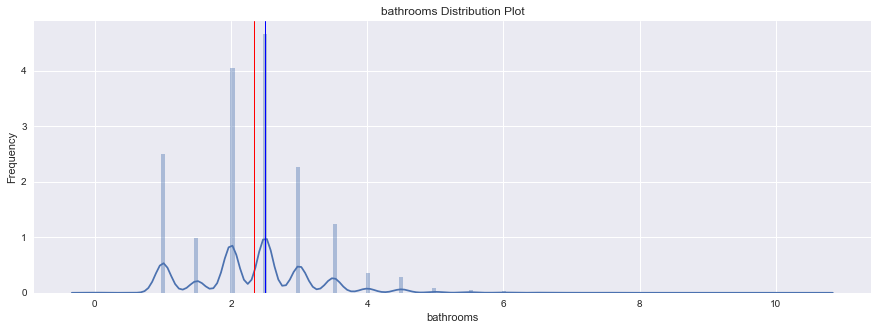

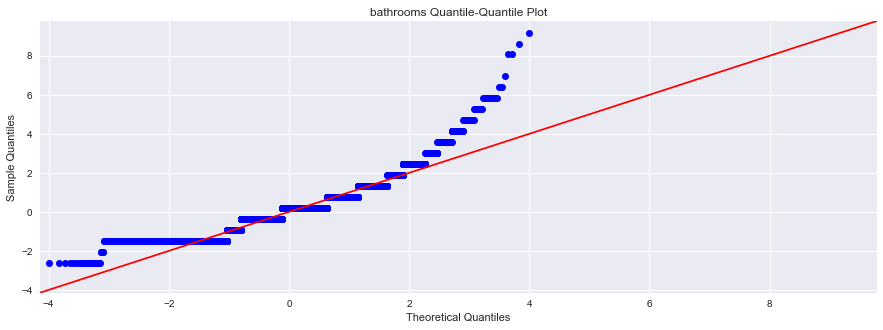

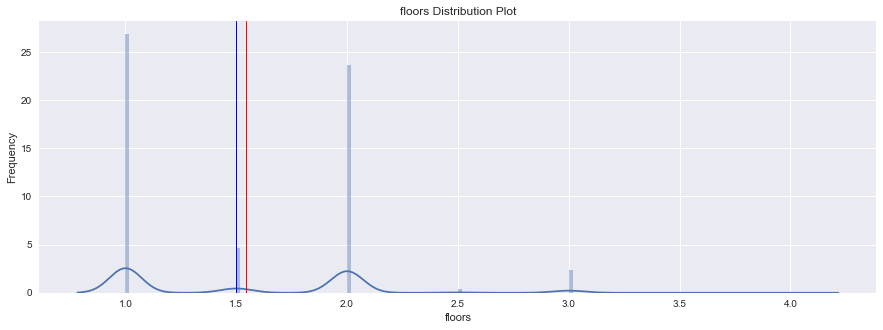

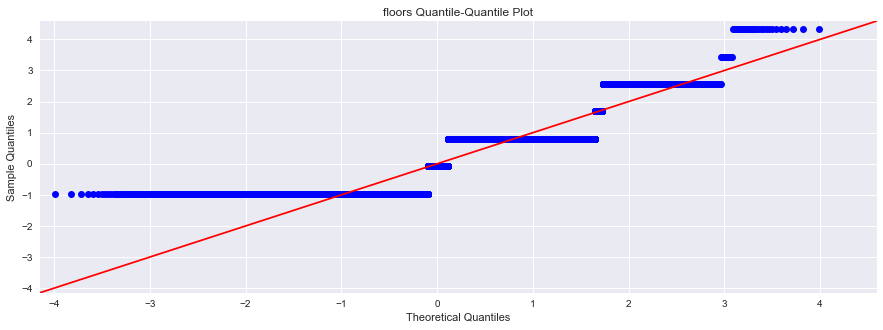

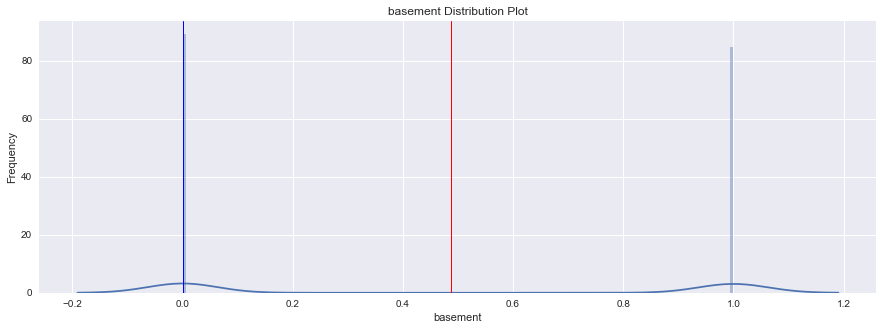

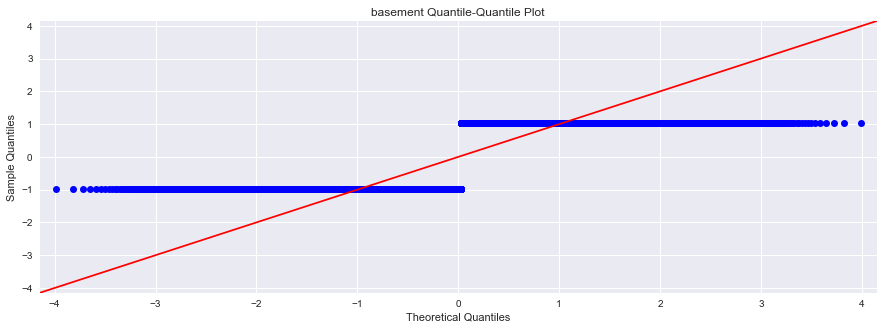

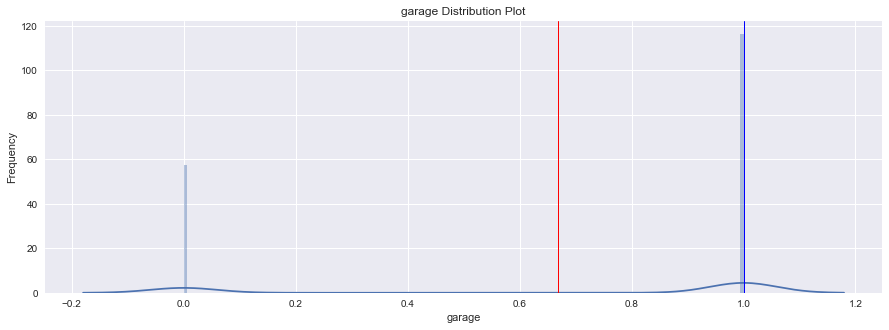

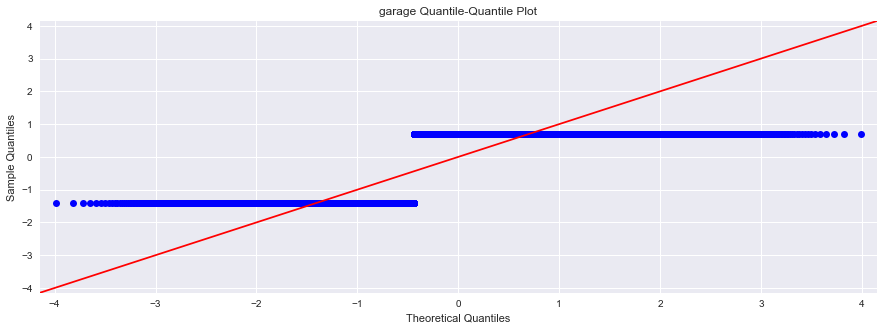

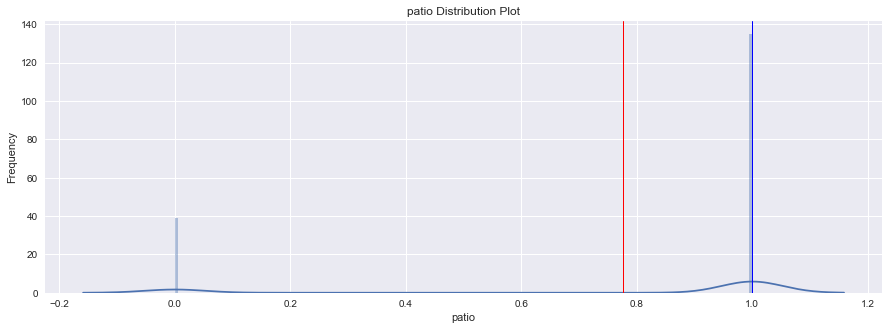

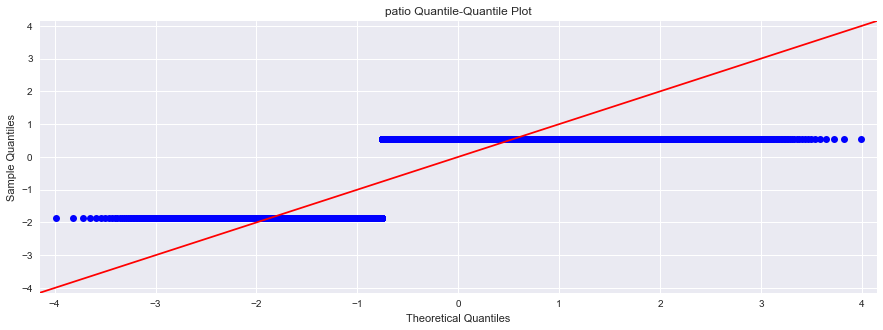

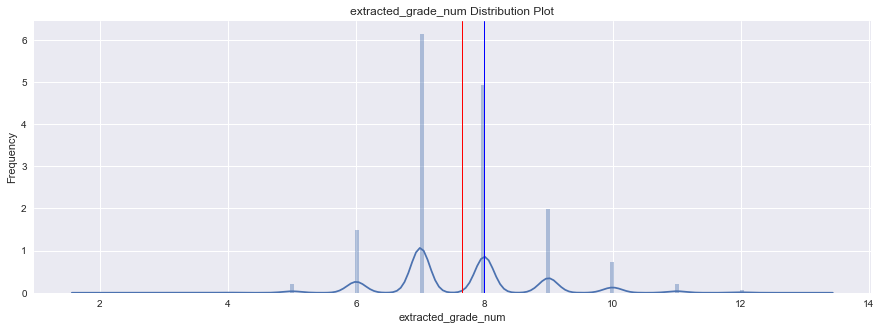

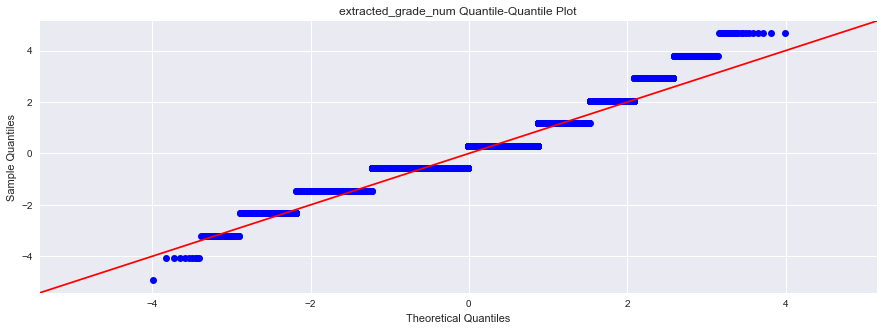

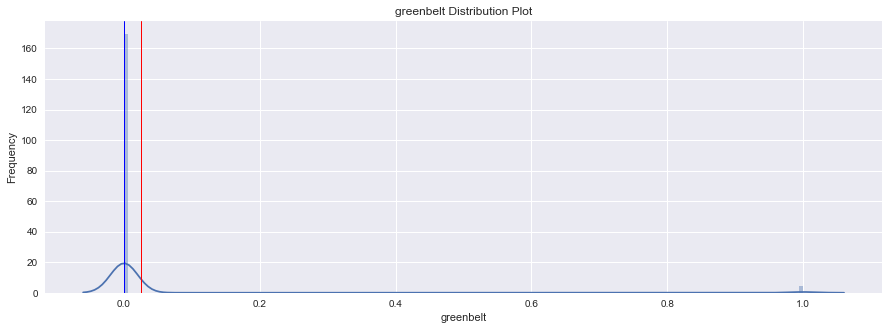

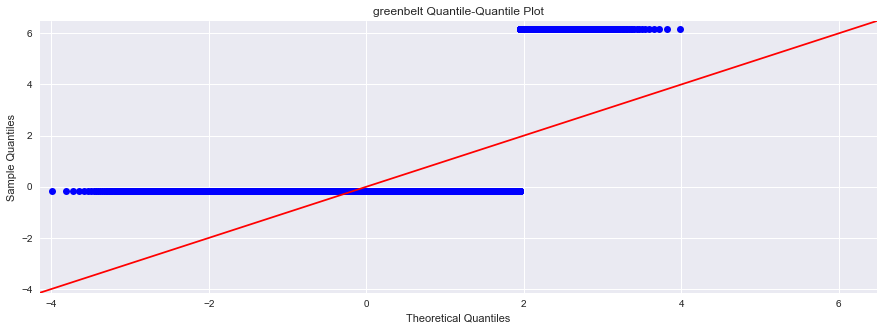

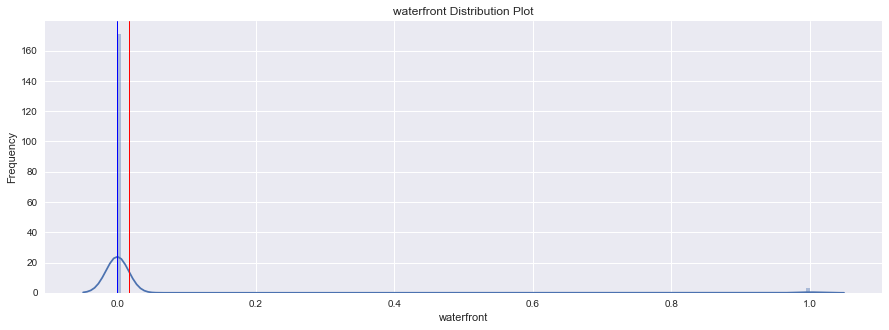

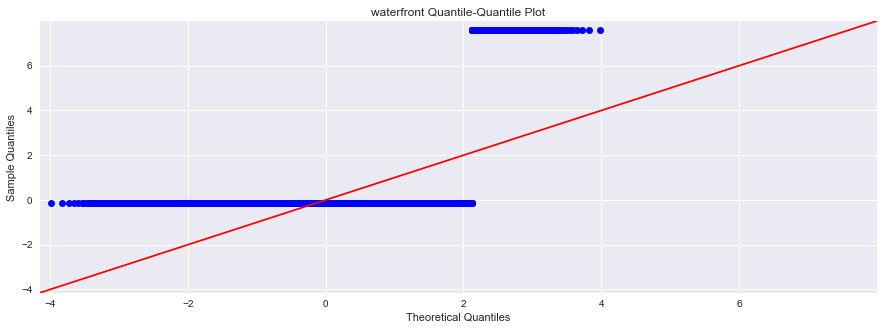

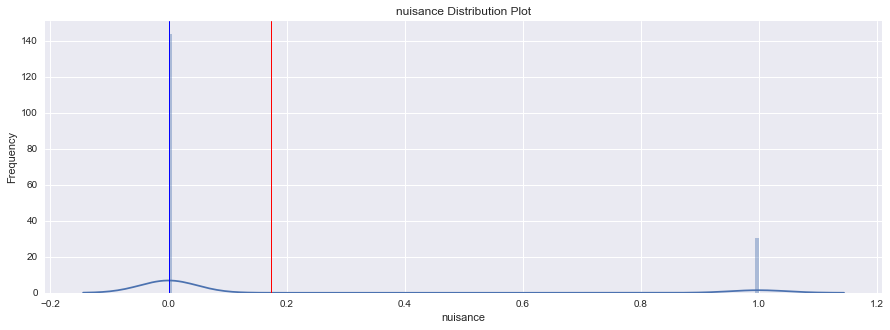

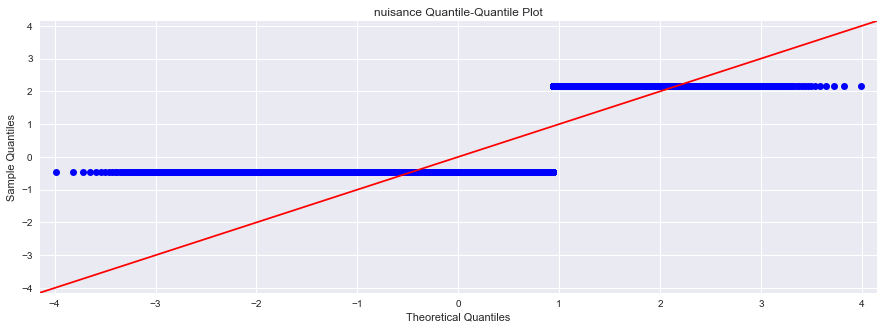

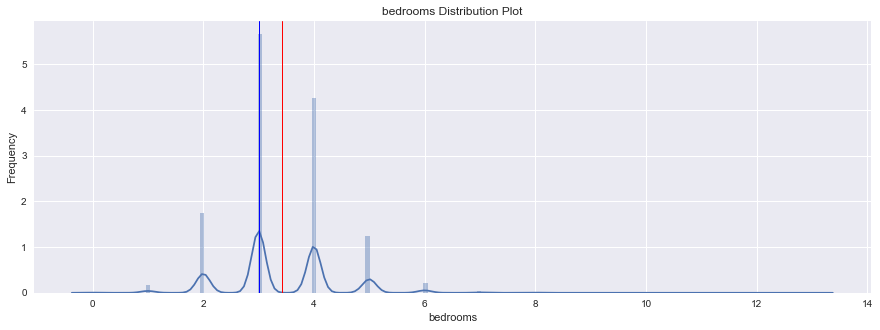

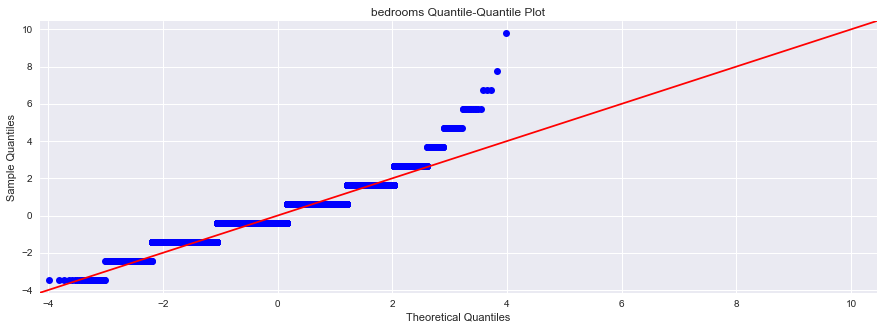

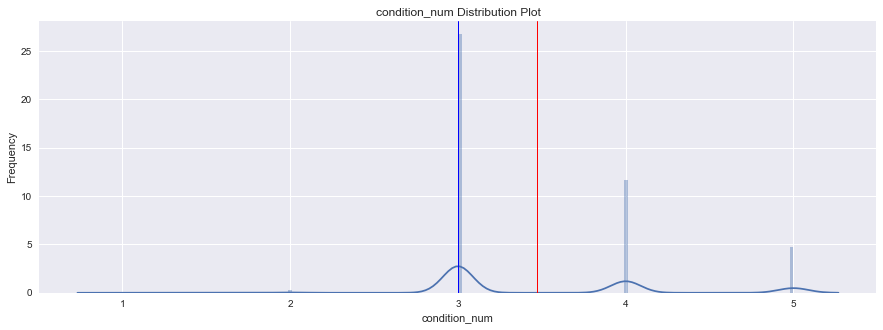

,Variable,Skewness,Kurtosis
0,bathrooms,0.750023,2.436508
1,floors,0.626090,-0.206385
2,basement,0.050367,-1.997596
3,garage,-0.716463,-1.486780
4,patio,-1.323743,-0.247721
5,extracted_grade_num,0.654239,1.338626
6,greenbelt,6.002707,34.034755
7,waterfront,7.479740,53.950101
8,nuisance,1.716904,0.947821
9,bedrooms,0.517018,1.916054


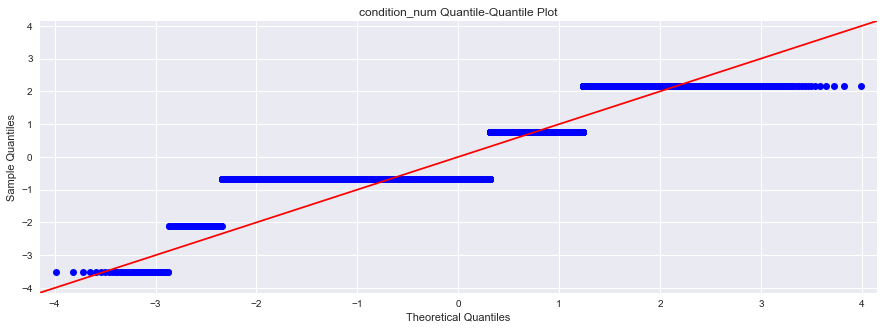

In [ ]:
categoricals = ["bathrooms", "floors", "basement", "garage", "patio", "extracted_grade_num", "greenbelt", "waterfront", "nuisance", "bedrooms", "condition_num"]
linearity_check(king, categoricals)

**Observations:**
1. Most homes have 3 to 4 bedrooms, 2 to 3 bathrooms, no traffic noise (nuisance), are not adjacent to a green belt, and are not on a waterfront.  

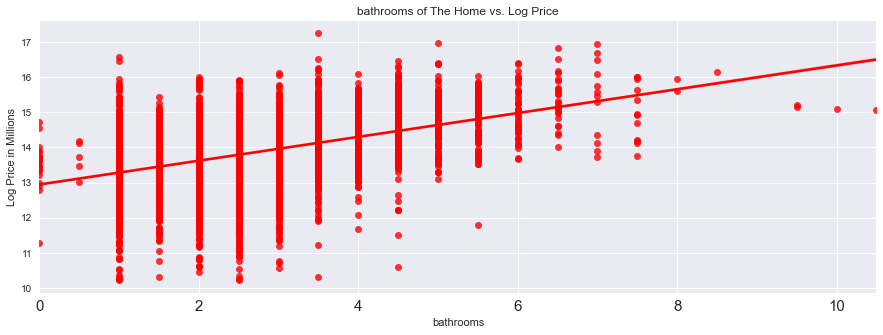

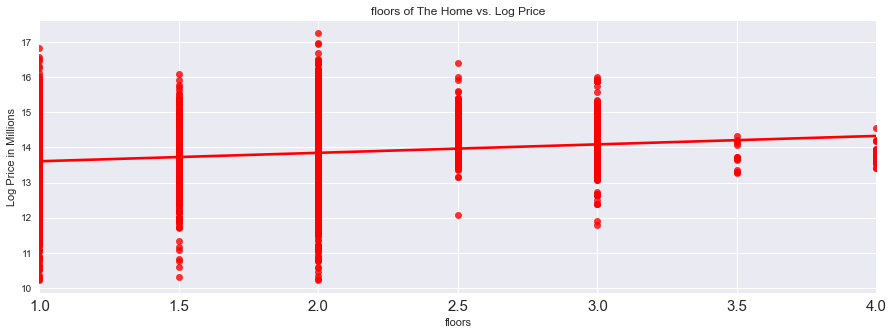

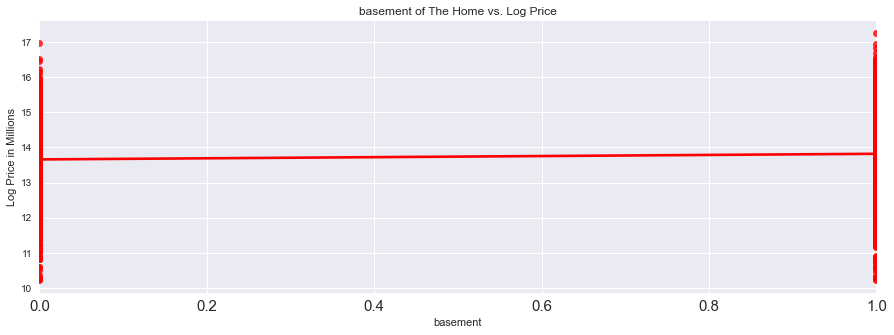

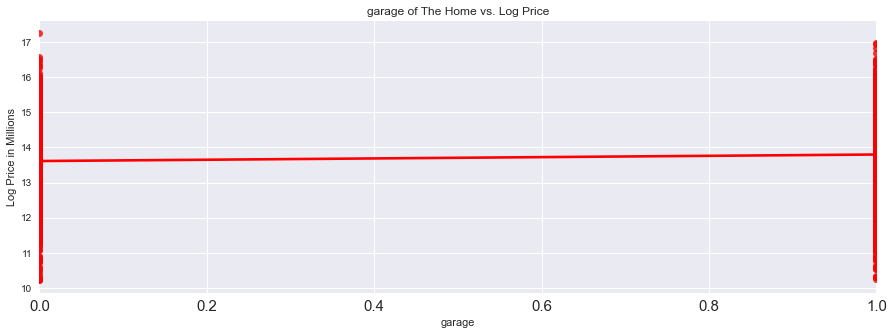

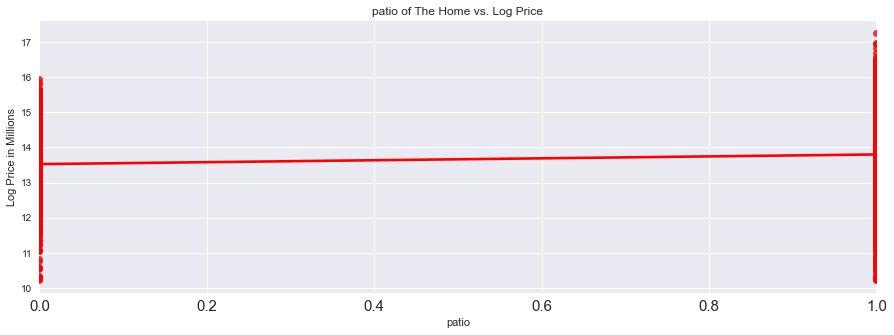

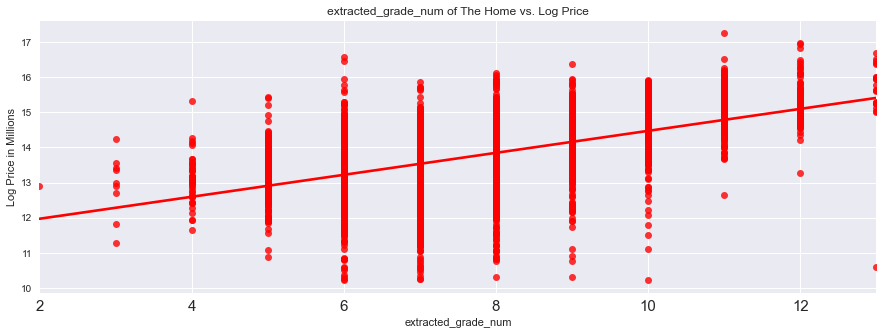

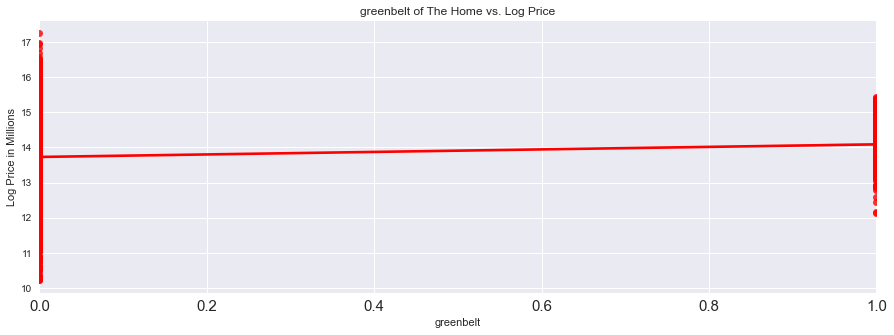

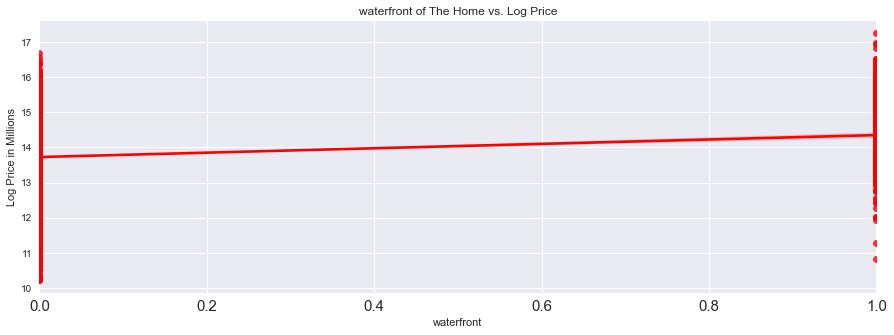

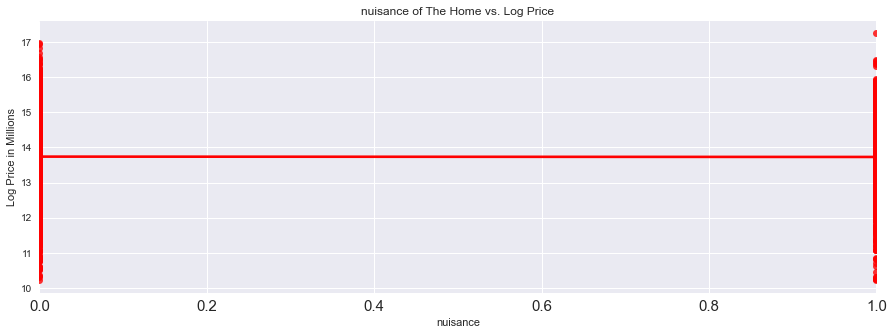

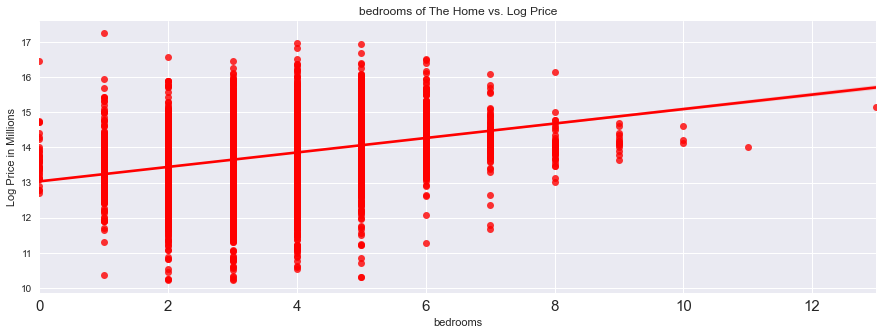

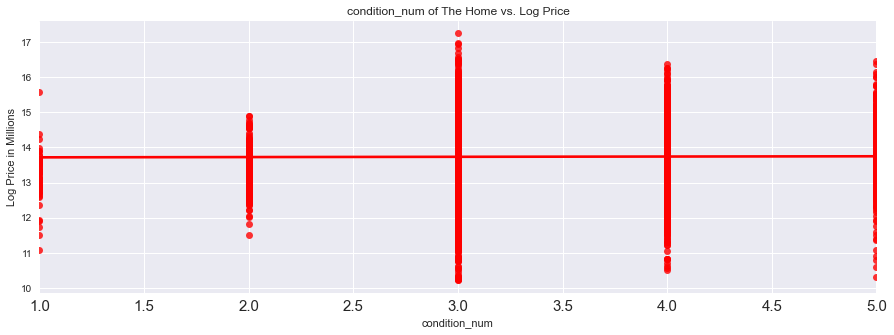

,bathrooms,floors,basement,garage,patio,extracted_grade_num,greenbelt,waterfront,nuisance,bedrooms,condition_num
bathrooms,1.000000,0.404269,0.124920,0.337921,0.284836,0.647023,0.093886,0.043996,-0.049902,0.588097,-0.066573
floors,0.404269,1.000000,-0.171647,0.099096,0.204033,0.465085,0.065291,-0.004177,-0.016232,0.146884,-0.282693
basement,0.124920,-0.171647,1.000000,-0.091695,0.084951,0.026580,-0.051826,0.014369,0.109033,0.069809,0.057693
garage,0.337921,0.099096,-0.091695,1.000000,0.107027,0.337823,0.102149,-0.060996,-0.139211,0.240166,-0.066578
patio,0.284836,0.204033,0.084951,0.107027,1.000000,0.257533,0.054408,0.041618,-0.050385,0.165608,-0.026990
extracted_grade_num,0.647023,0.465085,0.026580,0.337823,0.257533,1.000000,0.120098,0.047592,-0.060768,0.371892,-0.157484
greenbelt,0.093886,0.065291,-0.051826,0.102149,0.054408,0.120098,1.000000,-0.019687,-0.052937,0.065296,-0.029221
waterfront,0.043996,-0.004177,0.014369,-0.060996,0.041618,0.047592,-0.019687,1.000000,0.008078,-0.029701,0.005001
nuisance,-0.049902,-0.016232,0.109033,-0.139211,-0.050385,-0.060768,-0.052937,0.008078,1.000000,-0.049985,-0.021464
bedrooms,0.588097,0.146884,0.069809,0.240166,0.165608,0.371892,0.065296,-0.029701,-0.049985,1.000000,0.033817


In [ ]:
view_correlation(king, categoricals)

In [ ]:
def categorical_bar(data, subset):
    
    import seaborn as sns
    
    for col in subset:
        sns.barplot(x=data[col], 
                    y=data['price_log'],
                    palette="bright",
                    )
        plt.title(f"{col} vs Price_log")
        plt.xlabel(f"{col}")
        plt.ylabel("Price_log in Millions")
        plt.xticks(fontsize = 10)
        plt.show()

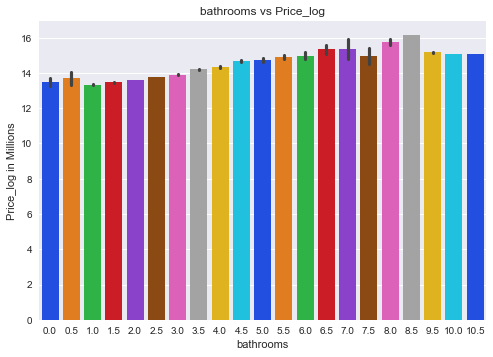

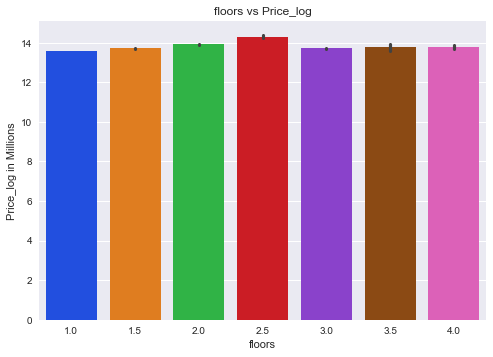

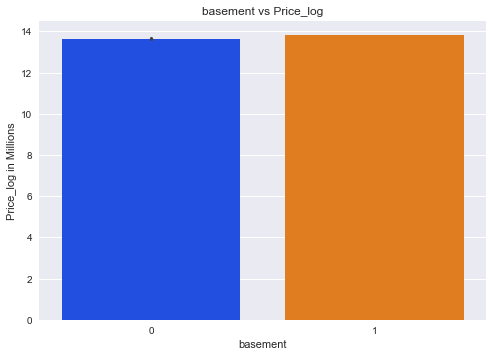

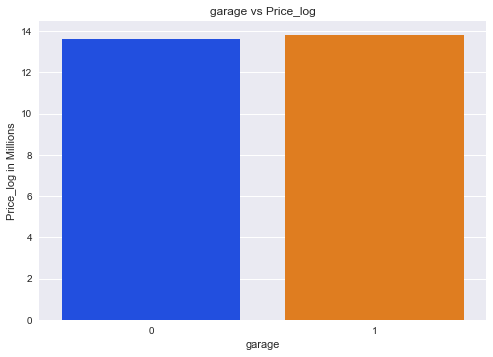

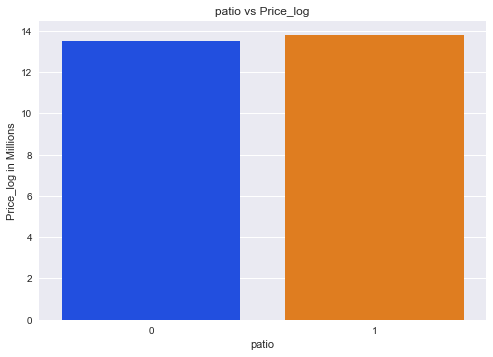

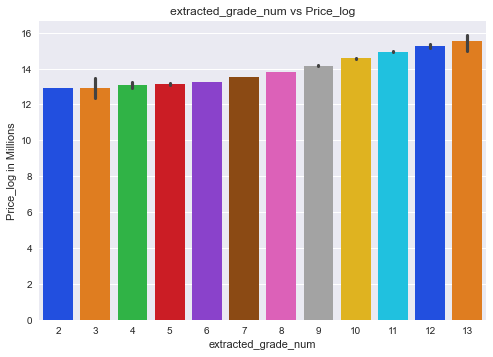

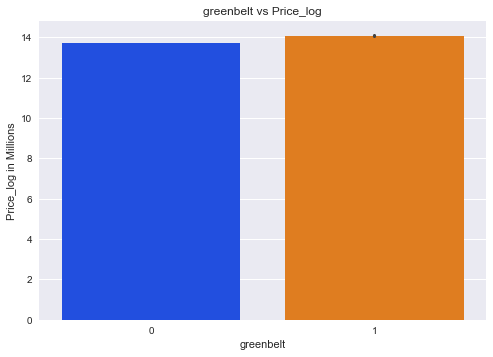

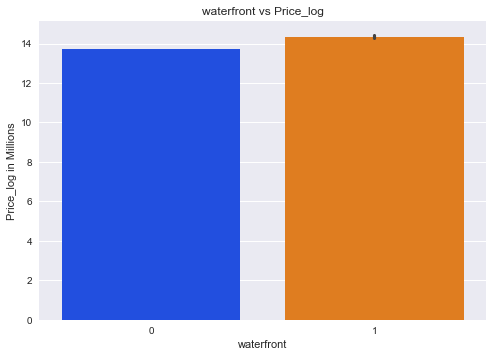

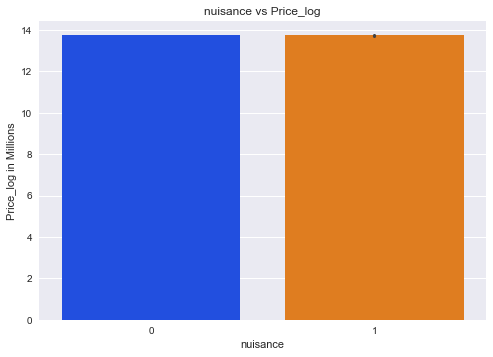

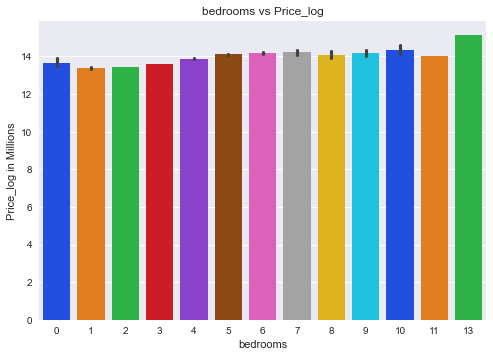

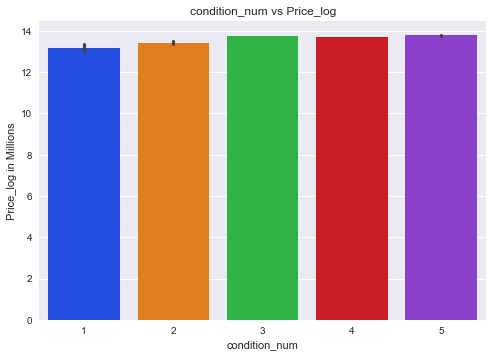

In [ ]:
categorical_bar(king, categoricals)

**Observations:**

Bathrooms: 

* Extra bathrooms in a home does contribute to the value of home. This peaks out at around 7 bathrooms. 
* After 7 bathrooms there is a sudden dip in price but then increases dramatically then decreases dramatically. It is not very reliable data beyond seven bathrooms. 
* Price is positively correlated with bathrooms being .51

Grade Number: 
* The quality build of the home does contribute to the value of the home. The price peak is a grade 13 being the best build quality. 
* Price is positively correlated with grade being .61

Green Belt: 
* It seems being next to a green belt in a home does contribute to the value of a home. Homes next to a green belt are priced much higher than homes not next to a green belt. 
* Price has little to no correlation with green belt. 
* Despite that being true being next a green belt in it seems that its is guarantee that the home would be priced higher in comparison to homes without a green belt

Waterfront:
* It seems being next to a green belt in a home does contribute to the value of a home. Homes next to a green belt are priced much higher than homes not next to a green belt. 
* Price has little to no correlation with waterfront. 
* Despite that being true being next to a waterfront guarantees that the home would be priced higher in comparison to homes without a waterfront.

Nuisance: 
* It seems that traffic does not do much in terms of impact home value. 

Bedrooms:
* Adding bedrooms to a home does increase its value. This seems to peak at 7 bedrooms. After 7 bedrooms it begins to decrease.

Condition:
* The condition of a home does increase its value. Average(3), Good(4), Very Good(5) are the categories to aim for maximizing home price. Majority of the houses are in condition 3 (average) and these homes perform equally as well as those with condition 4 (good) and condition 5 (very good). 


## Does location matter for homes?

In [ ]:
"""
We have two ways to determine a homes location. There is the coordinates and address. 
The address contains the zip code and we already have the price information.
With the coordinates maybe we can attempt to creata a heatmap with the interaction being price. 
"""

'\nWe have two ways to determine a homes location. There is the coordinates and address. \nThe address contains the zip code and we already have the price information.\nWith the coordinates maybe we can attempt to creata a heatmap with the interaction being price. \n'

In [ ]:
print(king.columns)

king['address'].head(5)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'grade', 'heat_source',
       'sewer_system', 'sqft_above', 'yr_built', 'address', 'lat', 'long',
       'basement', 'extracted_grade_num', 'condition_num', 'price_log',
       'garage', 'patio'],
      dtype='object')


21177    1526 I Street Northeast, Auburn, Washington 98...
10844    1412 I Street Northeast, Auburn, Washington 98...
9292     1104 Southwest Shorebrook Drive, Normandy Park...
17878    7205 South 133rd Street, Seattle, Washington 9...
14450    5610 South 141st Street, Tukwila, Washington 9...
Name: address, dtype: object

In [ ]:
# We need to extract the zipcode and an example of an address is this
king['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [504]:
# All the addresses follow the same format. #### street, city, state zipcode, country

# Extract the numbers using a regular expression and store it in a new column 'zipcode'
# , matches the comma in the address.
# \s* matches any number of spaces after the comma (optional spaces).
# (\d{5}) captures the five-digit number (the zip code).
# , matches the comma after the zip code.
# \s* matches any number of spaces after the comma (optional spaces).
# \w+ matches one or more word characters (representing the state name).
king['zipcode'] = king['address'].str.extract(r',\s*\w+\s*(\d{5}),')
king['zipcode_encoded'] = pd.factorize(king['zipcode'])[0]

# Print the DataFrame with the extracted zip code to check them
print(king[['zipcode_encoded','zipcode']])


       zipcode_encoded zipcode
21177                0   98002
10844                0   98002
9292                 1   98166
17878                2   98178
14450                3   98168
...                ...     ...
26982                1   98166
29172                1   98166
22523                1   98166
18938                1   98166
26110               90   98125

[30110 rows x 2 columns]


In [505]:
# Create a dictionary that maps each encoded number back to its original zip code
reverse_zipcode_mapping = dict(
    zip(
        king['zipcode_encoded'],
        king['zipcode']
    )
)

In [506]:
# Access the reverse mapping dictionary to get the original zip code from the encoded number
encoded_number = 0  # Replace this with the specific encoded number we may want to look up
original_zipcode = reverse_zipcode_mapping.get(encoded_number, "Not Found")
print("Original Zip Code:", original_zipcode)


Original Zip Code: 98002


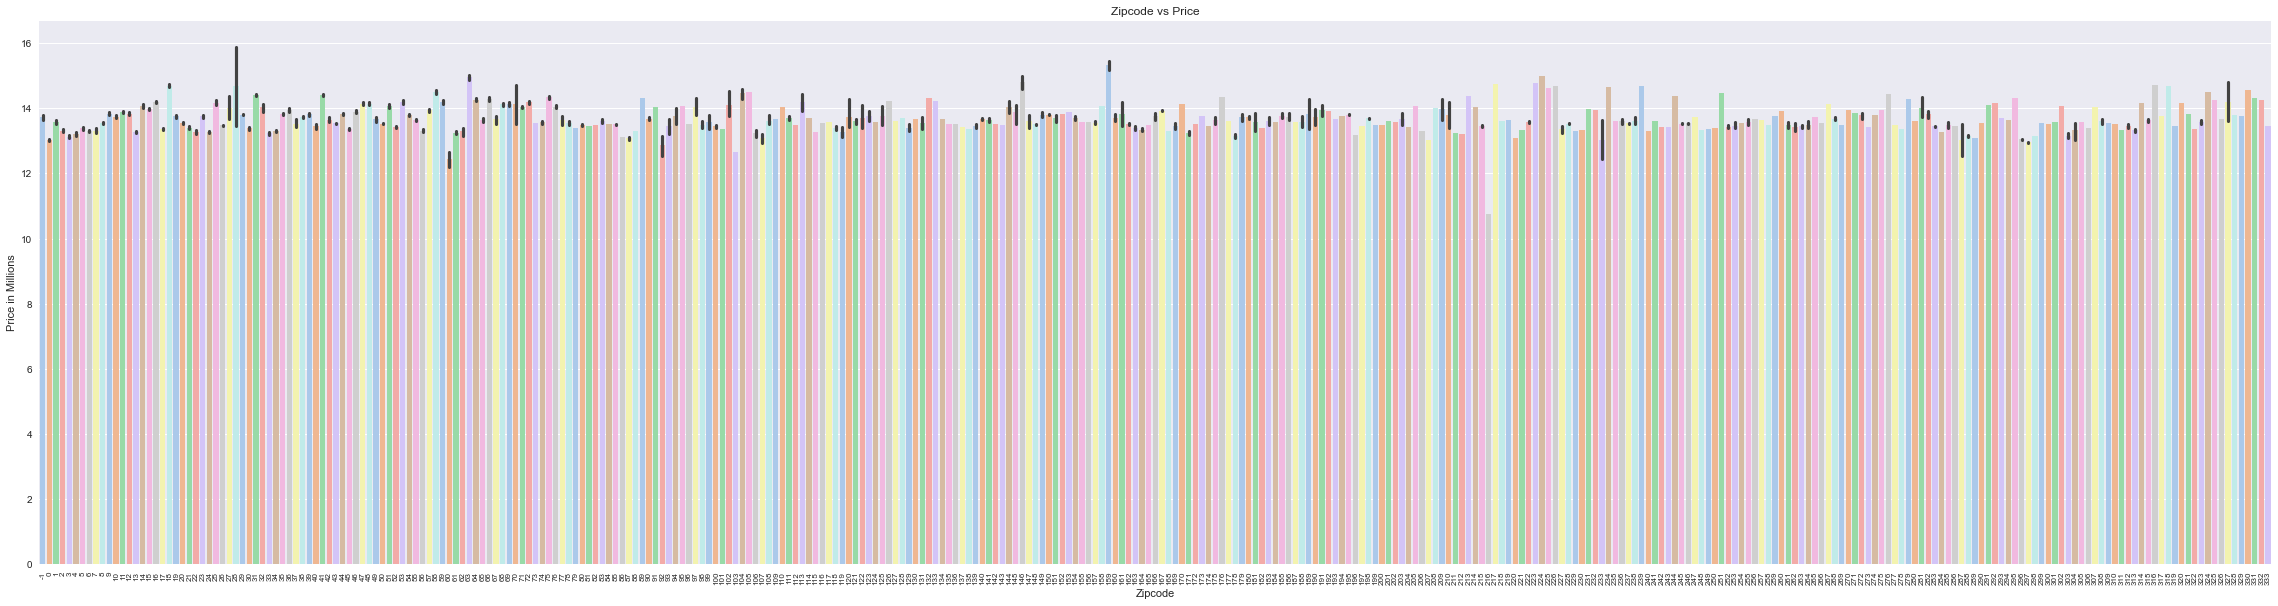

In [507]:
# plot barplot of zipcode vs price
plt.figure(figsize=(40,10))
sns.barplot(x=king['zipcode_encoded'], y=king['price_log'], palette="pastel")
plt.title('Zipcode vs Price')
plt.xlabel('Zipcode')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 8, rotation = 90)
plt.show()

It is clear that there are way to many zipcodes in this dataset however there are areas that show that a homes location matters in King County. By seeing the barplot we can see that there are ocassional peaks for zipcodes that can place homes higher in price than others

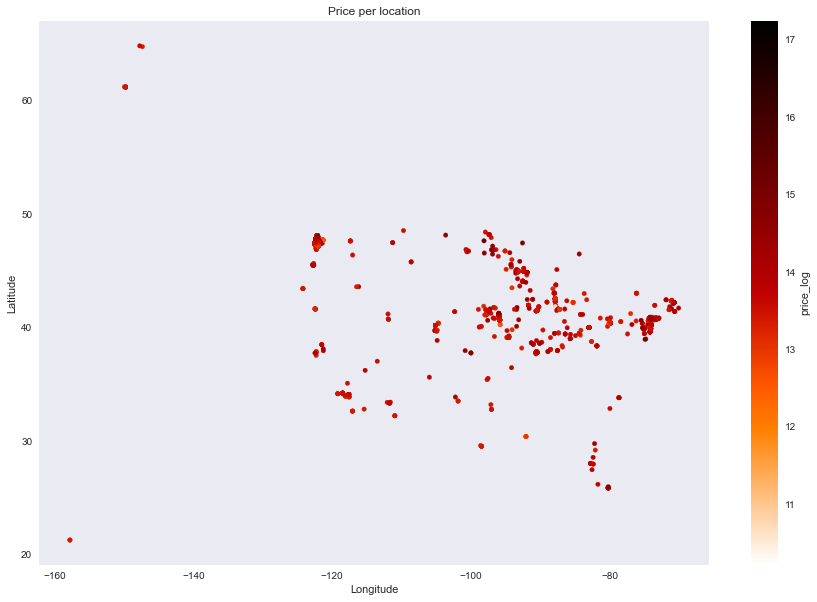

In [ ]:
# Create a scatter plot for latitude and longitude values
king.plot(
    kind="scatter", 
    x='long', 
    y='lat', 
    figsize=(15, 10), 
    c='price_log', 
    cmap="gist_heat_r", 
    colorbar=True, 
    sharex=False
)
plt.grid(which='both')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price per location')
plt.show()


**Observations:**
1. It seems location does matter to a degree. It also seems that the main limitation to this heatmap would be the number of records we have in this dataset. We can not see a full display of whether location does matter for a homes price in king county. 

## Start Preparation for Creating Models


The first thing to do is to clean up the dataframe then check for any multicollinarity issues

In [508]:
king.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'grade', 'heat_source',
       'sewer_system', 'sqft_above', 'sqft_garage', 'sqft_patio', 'yr_built',
       'address', 'lat', 'long', 'basement', 'extracted_grade_num',
       'condition_num', 'price_log', 'zipcode', 'zipcode_encoded'],
      dtype='object')

In [ ]:
"""
We do not need date, address, yr_built, lat, and long as well as zipcode since we encoded it.
"""

"\nWe do not need date, nuisance, view, heat_source, sewer_system, yr_built, 'yr_renovated', 'address', 'extracted_class', 'condition'\n"

In [509]:
subset = ['date', 'address', 'yr_built', 'lat', 'long', 'zipcode']
king.drop(labels=subset, axis=1, inplace=True)

In [510]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=king.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [511]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.883732
"(bathrooms, sqft_living)",0.772209


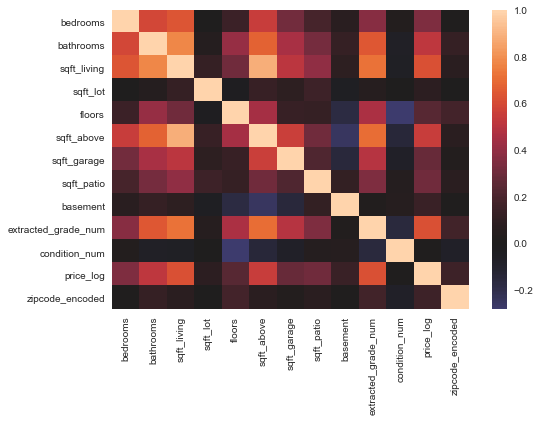

In [512]:
sns.heatmap(king.corr(), center=0);

Overall correlation between .75 and less than 1 is an indication of multicollinearity. Lets now view each of the features in correlation to price. Lets view log features and normal features seperately. We will have to determine which variables to drop from each set to avoid multicollinearity. 

In [513]:
# compare continuous feature correlations with 'price'
# determine which variables actually do not matter for a model with target variable price
king[['sqft_living', 'sqft_above','sqft_lot', 'sqft_garage', 'sqft_patio', 'price_log']].corr()

,sqft_living,sqft_above,sqft_lot,sqft_garage,sqft_patio,price_log
sqft_living,1.000000,0.883732,0.122282,0.510960,0.396530,0.621964
sqft_above,0.883732,1.000000,0.131761,0.559966,0.312589,0.548116
sqft_lot,0.122282,0.131761,1.000000,0.089321,0.154577,0.084713
sqft_garage,0.510960,0.559966,0.089321,1.000000,0.216507,0.284608
sqft_patio,0.396530,0.312589,0.154577,0.216507,1.000000,0.310323
price_log,0.621964,0.548116,0.084713,0.284608,0.310323,1.000000


**Observations:**
* There are two pairs that can show multicollinearity. 
* Based off these pairs we should drop sqft_living since this appeared the most times. 

In [514]:
# drop features 
king.drop(labels=["sqft_living"], axis=1, inplace=True)

In [515]:
king.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'greenbelt', 'nuisance', 'grade', 'heat_source', 'sewer_system',
       'sqft_above', 'sqft_garage', 'sqft_patio', 'basement',
       'extracted_grade_num', 'condition_num', 'price_log', 'zipcode_encoded'],
      dtype='object')

In [516]:
king.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,greenbelt,nuisance,grade,heat_source,sewer_system,sqft_above,sqft_garage,sqft_patio,basement,extracted_grade_num,condition_num,price_log,zipcode_encoded
21177,3,1.5,39808,1.0,NO,NO,NO,7 Average,Oil,PUBLIC,1790,460,290,0,7,4,12.422989,0
10844,4,1.5,12866,1.5,NO,NO,NO,7 Average,Gas,PUBLIC,2232,440,60,0,7,4,13.319574,0
9292,5,2.0,15156,1.0,NO,NO,NO,8 Good,Oil,PUBLIC,1380,0,0,1,8,4,13.835313,1
17878,5,2.0,15552,1.0,NO,NO,NO,7 Average,Oil,PRIVATE,1210,0,330,1,7,3,13.321214,2
14450,3,2.0,8620,1.5,NO,NO,NO,7 Average,Gas,PUBLIC,1720,0,0,0,7,5,13.458836,3


Now that we got rid of multicollinearity issues we need to convert our categorical variables into usable variables for our model by using the dummies method. So far we have this ...

In [376]:
king_continuous = king[['price_log', 'sqft_lot', 'sqft_above', 'sqft_garage', 'sqft_patio']]
# Ordinal is like categorical however there is a distinction between catergories and you can rank them. This would suggest that it would not require one hot encoding.
king_ordinals = king[['bedrooms', 'bathrooms', 'floors', 'condition_num', 'extracted_grade_num', 'zipcode_encoded']]
king_categoricals = king[['waterfront', 'greenbelt', 'basement', 'sewer_system', 'heat_source']]

## Prepare Categorical Data with One Hot Encoding

In [518]:
# Make sure all data types are strings first
king['waterfront'] = king['waterfront'].astype('str')
king['greenbelt'] = king['greenbelt'].astype('str')
king['basement'] = king['basement'].astype('float64').astype('str')
king['sewer_system'] = king['sewer_system'].astype('str')
king['heat_source'] = king['heat_source'].astype('str')

In [519]:
# Create the dummy variables
waterfront_dummies = pd.get_dummies(king['waterfront'], prefix='waterfront', drop_first=True)
greenbelt_dummies = pd.get_dummies(king['greenbelt'], prefix='greenbelt', drop_first=True)
basement_dummies = pd.get_dummies(king['basement'], prefix='basement', drop_first=True)
sewer_dummies = pd.get_dummies(king['sewer_system'], prefix='sewer') # drop manually since there is a huge disparity between the types of sewers.
heat_dummies = pd.get_dummies(king['heat_source'], prefix='heat') # drop manually since there is a huge disparity between sources of heat.

Create a clean dataframe that can be used for modeling.

In [520]:
# Merge dummies, categoricals, and continuous columns
clean_df = pd.concat([king_continuous, king_ordinals, king_categoricals, waterfront_dummies, greenbelt_dummies, basement_dummies, sewer_dummies, heat_dummies], axis=1)

In [521]:
clean_df.head()

,price_log,sqft_lot,sqft_above,sqft_garage,sqft_patio,bedrooms,bathrooms,floors,condition_num,extracted_grade_num,...,sewer_PRIVATE RESTRICTED,sewer_PUBLIC,sewer_PUBLIC RESTRICTED,heat_Electricity,heat_Electricity/Solar,heat_Gas,heat_Gas/Solar,heat_Oil,heat_Oil/Solar,heat_Other
21177,12.422989,39808,1790,460,290,3,1.5,1.0,4,7,...,0,1,0,0,0,0,0,1,0,0
10844,13.319574,12866,2232,440,60,4,1.5,1.5,4,7,...,0,1,0,0,0,1,0,0,0,0
9292,13.835313,15156,1380,0,0,5,2.0,1.0,4,8,...,0,1,0,0,0,0,0,1,0,0
17878,13.321214,15552,1210,0,330,5,2.0,1.0,3,7,...,0,0,0,0,0,0,0,1,0,0
14450,13.458836,8620,1720,0,0,3,2.0,1.5,5,7,...,0,1,0,0,0,1,0,0,0,0


In [523]:
clean_df.columns

Index(['price_log', 'sqft_lot', 'sqft_above', 'sqft_garage', 'sqft_patio',
       'bedrooms', 'bathrooms', 'floors', 'condition_num',
       'extracted_grade_num', 'waterfront', 'greenbelt', 'basement',
       'waterfront_YES', 'greenbelt_YES', 'basement_1.0', 'sewer_PRIVATE',
       'sewer_PRIVATE RESTRICTED', 'sewer_PUBLIC', 'sewer_PUBLIC RESTRICTED',
       'heat_Electricity', 'heat_Electricity/Solar', 'heat_Gas',
       'heat_Gas/Solar', 'heat_Oil', 'heat_Oil/Solar', 'heat_Other'],
      dtype='object')

In [524]:
print(clean_df['sewer_PRIVATE'].value_counts())
print('SPACE')
print(clean_df['sewer_PRIVATE RESTRICTED'].value_counts())
print('SPACE')
print(clean_df['sewer_PUBLIC'].value_counts())
print('SPACE')
print(clean_df['sewer_PUBLIC RESTRICTED'].value_counts())

0    25774
1     4336
Name: sewer_PRIVATE, dtype: int64
SPACE
0    30105
1        5
Name: sewer_PRIVATE RESTRICTED, dtype: int64
SPACE
1    25766
0     4344
Name: sewer_PUBLIC, dtype: int64
SPACE
0    30107
1        3
Name: sewer_PUBLIC RESTRICTED, dtype: int64


In [525]:
print(clean_df['heat_Electricity'].value_counts())
print('SPACE')
print(clean_df['heat_Electricity/Solar'].value_counts())
print('SPACE')
print(clean_df['heat_Gas'].value_counts())
print('SPACE')
print(clean_df['heat_Gas/Solar'].value_counts())
print('SPACE')
print(clean_df['heat_Oil'].value_counts())
print('SPACE')
print(clean_df['heat_Oil/Solar'].value_counts())
print('SPACE')
print(clean_df['heat_Other'].value_counts())

0    23650
1     6460
Name: heat_Electricity, dtype: int64
SPACE
0    30051
1       59
Name: heat_Electricity/Solar, dtype: int64
SPACE
1    20575
0     9535
Name: heat_Gas, dtype: int64
SPACE
0    30017
1       93
Name: heat_Gas/Solar, dtype: int64
SPACE
0    27211
1     2899
Name: heat_Oil, dtype: int64
SPACE
0    30106
1        4
Name: heat_Oil/Solar, dtype: int64
SPACE
0    30090
1       20
Name: heat_Other, dtype: int64


In [526]:
# drop original data since dummies have been made
# drop sewer_PUBLIC RESTRICTED and PRIVATE RESTRICTED dummies since they make up a very small percentage of the data
# drop heat_Other and heat_Oil/Solar dummies since other is not very meaningful and they also make up a very small percentage of the data.
clean_df.drop(
    labels=["waterfront", 'greenbelt', 'basement', 'heat_Other', 'heat_Oil/Solar', 'sewer_PUBLIC RESTRICTED', 'sewer_PRIVATE RESTRICTED'], 
    axis=1,
    inplace=True
)

In [527]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=clean_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [528]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sewer_PRIVATE, sewer_PUBLIC)",0.998924
"(heat_Electricity, heat_Gas)",0.767733


Drop heat_Electricity since more people use gas

In [530]:
clean_df.drop(labels='heat_Electricity', axis=1, inplace=True)

In [533]:
clean_df.drop(labels='sewer_PRIVATE', axis=1, inplace=True)

In [534]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=clean_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [535]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,


In [536]:
clean_df.head()

,price_log,sqft_lot,sqft_above,sqft_garage,sqft_patio,bedrooms,bathrooms,floors,condition_num,extracted_grade_num,waterfront_YES,greenbelt_YES,basement_1.0,sewer_PUBLIC,heat_Electricity/Solar,heat_Gas,heat_Gas/Solar,heat_Oil
21177,12.422989,39808,1790,460,290,3,1.5,1.0,4,7,0,0,0,1,0,0,0,1
10844,13.319574,12866,2232,440,60,4,1.5,1.5,4,7,0,0,0,1,0,1,0,0
9292,13.835313,15156,1380,0,0,5,2.0,1.0,4,8,0,0,1,1,0,0,0,1
17878,13.321214,15552,1210,0,330,5,2.0,1.0,3,7,0,0,1,0,0,0,0,1
14450,13.458836,8620,1720,0,0,3,2.0,1.5,5,7,0,0,0,1,0,1,0,0


Now that we have all the important information sorted out lets redefine the two goals. 
1. Create a dataframe with the target variable only normalized. 
2. Create a dataframe with the target variable and the othe continous variables normalized.

In [539]:
transformed_clean = clean_df.copy()

For the transformed set we can not actually transform garge or patio because of there discrete values. This would result in infinity values from the transformation. Instead to account fot these features lets fo what we did to basement.

In [540]:
subset = ["sqft_lot", "sqft_above"]
transform(transformed_clean, subset)

In [542]:
# drop non-log transformed features. 
subset = ["sqft_lot", "sqft_above"]
transformed_clean.drop(labels=subset, axis=1, inplace=True)

In [543]:
transformed_clean.head()

,price_log,sqft_garage,sqft_patio,bedrooms,bathrooms,floors,condition_num,extracted_grade_num,waterfront_YES,greenbelt_YES,basement_1.0,sewer_PUBLIC,heat_Electricity/Solar,heat_Gas,heat_Gas/Solar,heat_Oil,sqft_lot_log,sqft_above_log
21177,12.422989,460,290,3,1.5,1.0,4,7,0,0,0,1,0,0,0,1,10.591823,7.489971
10844,13.319574,440,60,4,1.5,1.5,4,7,0,0,0,1,0,1,0,0,9.462343,7.710653
9292,13.835313,0,0,5,2.0,1.0,4,8,0,0,1,1,0,0,0,1,9.626152,7.229839
17878,13.321214,0,330,5,2.0,1.0,3,7,0,0,1,0,0,0,0,1,9.651945,7.098376
14450,13.458836,0,0,3,2.0,1.5,5,7,0,0,0,1,0,1,0,0,9.061840,7.450080


Now lets convert the patio and garage features into binary categorical variables as we did with basement. 

In [545]:
transformed_clean['garage'] = transformed_clean['sqft_garage'].apply(lambda x: 1 if x > 0 else 0)
transformed_clean['patio'] = king['sqft_patio'].apply(lambda x: 1 if x > 0 else 0)

transformed_clean.drop(labels=['sqft_garage', 'sqft_patio'], axis=1, inplace=True)

In [546]:
transformed_clean.head()

,price_log,bedrooms,bathrooms,floors,condition_num,extracted_grade_num,waterfront_YES,greenbelt_YES,basement_1.0,sewer_PUBLIC,heat_Electricity/Solar,heat_Gas,heat_Gas/Solar,heat_Oil,sqft_lot_log,sqft_above_log,garage,patio
21177,12.422989,3,1.5,1.0,4,7,0,0,0,1,0,0,0,1,10.591823,7.489971,1,1
10844,13.319574,4,1.5,1.5,4,7,0,0,0,1,0,1,0,0,9.462343,7.710653,1,1
9292,13.835313,5,2.0,1.0,4,8,0,0,1,1,0,0,0,1,9.626152,7.229839,0,0
17878,13.321214,5,2.0,1.0,3,7,0,0,1,0,0,0,0,1,9.651945,7.098376,0,1
14450,13.458836,3,2.0,1.5,5,7,0,0,0,1,0,1,0,0,9.061840,7.450080,0,0


In [ ]:
# save dataframe with only price that was normalized as csv
transformed_clean.to_csv('../data/transformed_clean.csv')

In [537]:
# save dataframe with only price that was normalized as csv
clean_df.to_csv('../data/king_clean_df.csv')